# Telco Customer Churn analysis

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. It is also the rate at which employees leave their jobs within a certain period. For a company to expand its clientele, its growth rate (measured by the number of new customers) must exceed its churn rate.

In this customer churn analysis, the aims are to predict behavior to retain customers. All relevant customer data can be analysed and developed to focus on customer retention for the company.

Dataset from https://www.kaggle.com/blastchar/telco-customer-churn

Kernel inspiration from: https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction

In [472]:
# Importing relevant libraries

# Data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import statsmodels

# Machine learning
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

# Loading the data

In [259]:
# Importing the data

df = pd.read_csv('telco-customer-churn.csv')

In [260]:
pd.options.display.max_columns = 50
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [261]:
# Observe what datatypes we are dealing with

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [262]:
# Check for null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Looks like there's no null data to clean!

In [263]:
# There are blank data in the TotalCharges column which we need to deal with

df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [264]:
# Examples such as index 488 which we need to remove as we cannot convert the column to numeric

df.loc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [265]:
# I have decided to remove these columns as there is no logical way to fill these values in without additional information related to cost

df['TotalCharges'].replace(' ', np.nan, inplace=True) # Convert the blanks into nan values

In [266]:
# Checking that the NaN value has replaced the blank

df.loc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [267]:
# Drop all NA values in the dataframe

df = df.dropna()

In [268]:
# We can now convert the TotalCharges column to floating point

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

C:\Users\Alistair\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [269]:
df.reset_index(drop=True, inplace=True) # Reset the order of the index and drop the previous index, as we have removed some rows

In [270]:
# df.shape

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## What does the data mean?

* Customers who left within the last month – the column is called Churn - **This is the target variable**
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

# Exploratory data analysis

## Check counts of categorical features - observe distribution of the feature

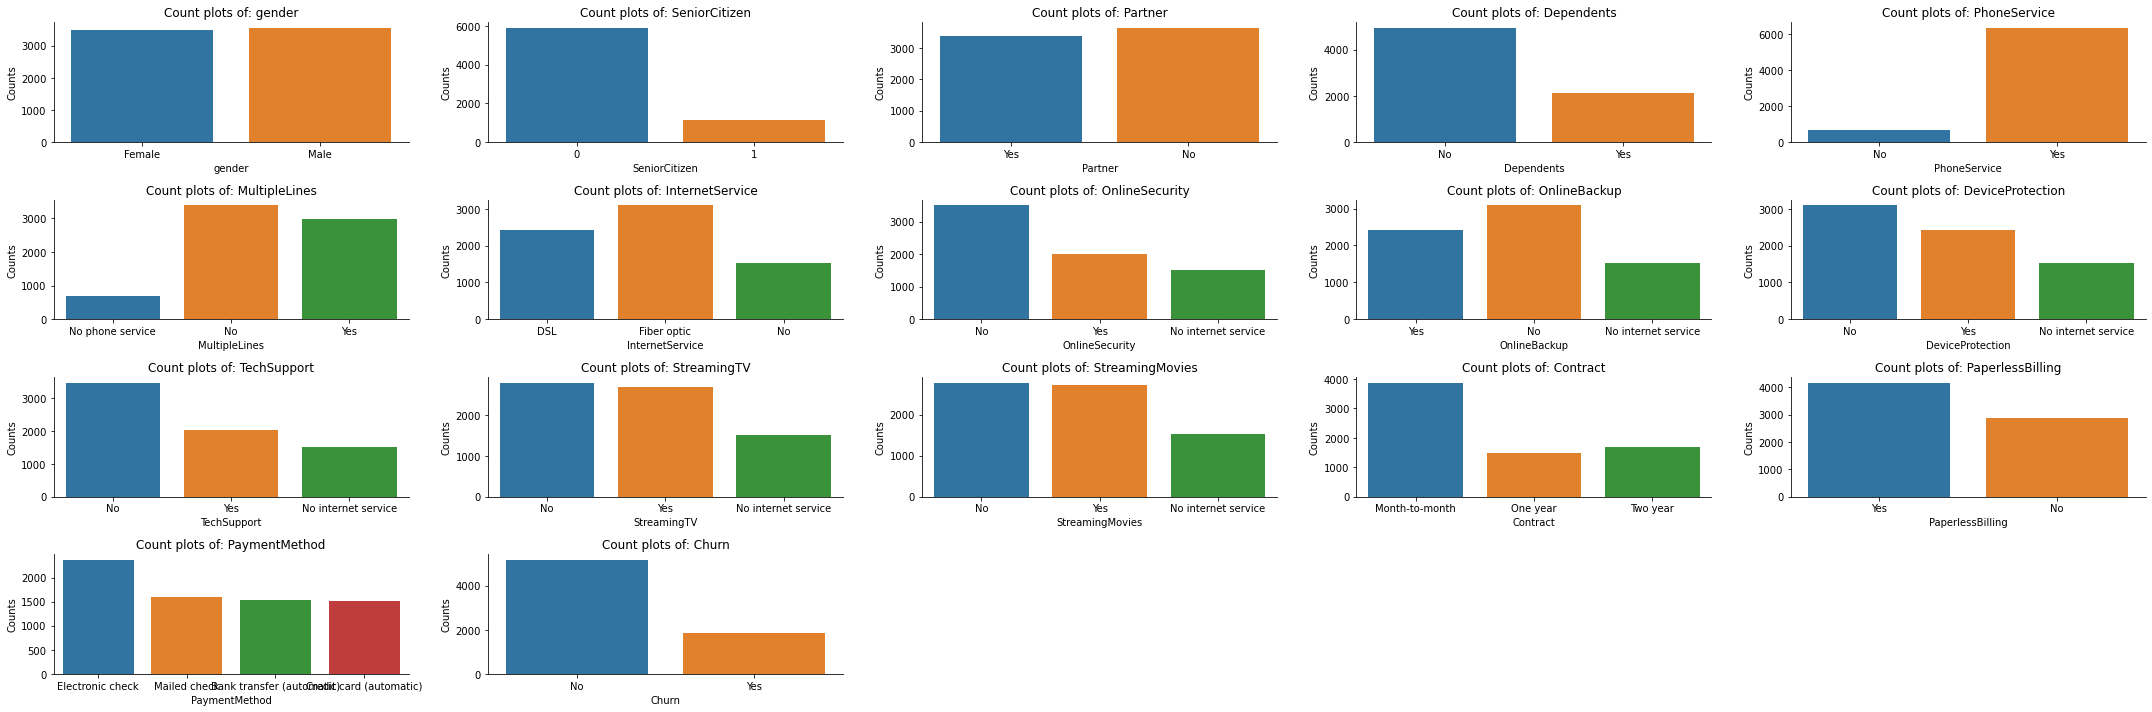

In [271]:
# Categorical features

index_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=[30,10])

index = 1
rows = 4
columns = 5

for col in index_cols:
    plt.subplot(rows,columns,index)
    sns.countplot(df[col])
    sns.despine()
    plt.title('Count plots of: ' + col)
    plt.ylabel('Counts')
    index += 1

plt.tight_layout()
plt.show()

## Quick data cleaning
### We can replace the 'No Internet Service' on the optional features such as 'MultipleLines'm 'OnlineBackup, etc, with 'No' to make our analysis and modelling easier later

In [272]:
# replacing 'No phone service' and 'No Internet Service' with 'No'

replace_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in replace_cols:
    df[col] = df[col].apply(lambda x: x.replace('No internet service','No').replace('No phone service', 'No'))
    
    
# Another viable method to replace instead of using lambda functions    
# for col in replace_cols:
#    df[col] = df[col].replace({'No internet service' : 'No'})

C:\Users\Alistair\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Check relationship between target variable (Churn) and other features

## My initial thoughts

Churned customers
* Monthly to monthly contracts more likely
* Younger customers 
* Only subscribed to a few services
* Customers that are newer to the company

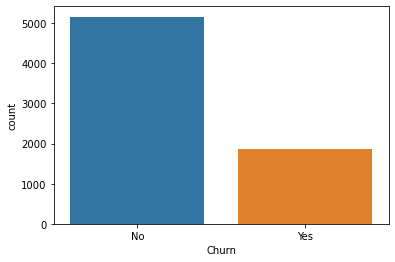

In [273]:
# Check churned customer counts

sns.countplot(df['Churn'])

# Visualising with piecharts

Text(0.5, 1.0, 'Churned Customers')

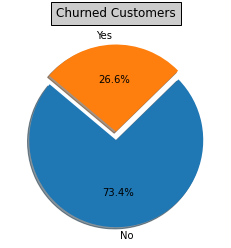

In [274]:
# Piechart with matplotlib

explode = (0.1, 0)  

plt.pie(x=df['Churn'].value_counts(),
        labels = df['Churn'].unique(),
        explode = explode,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=140)

plt.title("Churned Customers", bbox={'facecolor':'0.8', 'pad':5})

## Using plotly library package to visualise piecharts

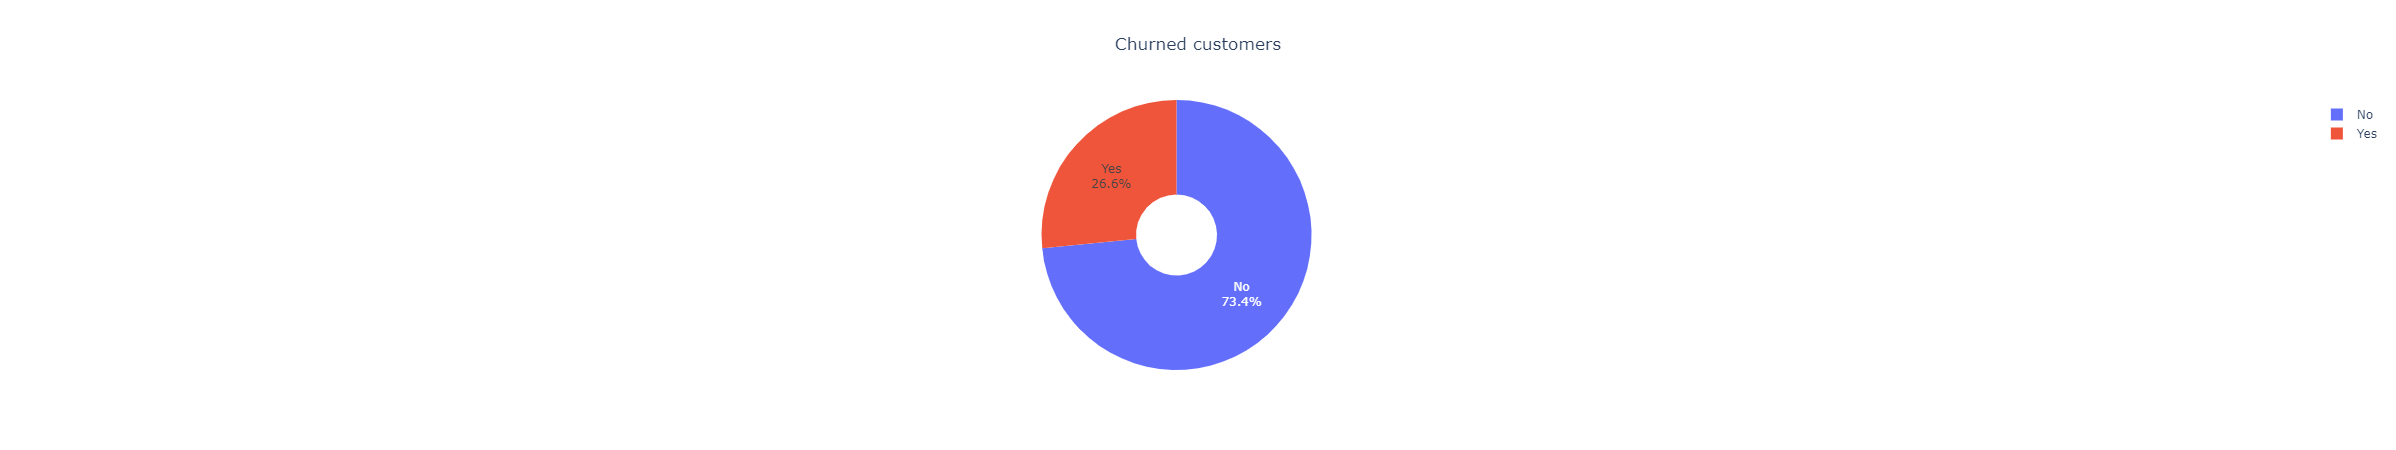

In [275]:
# Represent churned customers in donut chart

labels = df['Churn'].unique()
values = df['Churn'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels , values=values, textinfo='label+percent', hole=.3)])
fig.update_layout(title_text = 'Churned customers', title_x = 0.5)

fig.show()

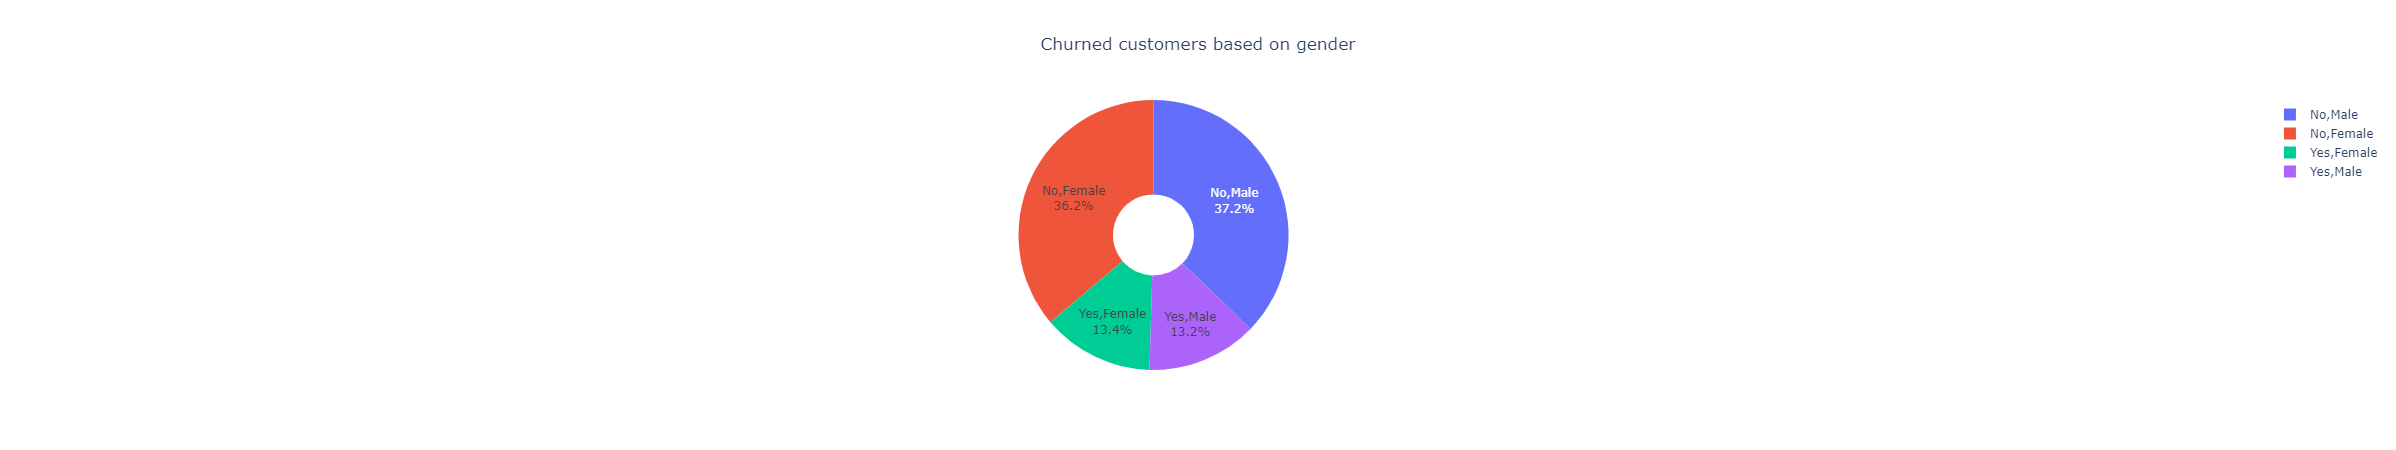

In [276]:
# Further distinguish churned customers from gender

grouped = df.groupby(['Churn'])['gender'].value_counts()
labels = grouped.index.unique()
target = grouped

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels , values=target,  textinfo='label+percent', hole=.3)])

fig.update_layout(title_text = 'Churned customers based on gender', title_x = 0.5)

fig.show()

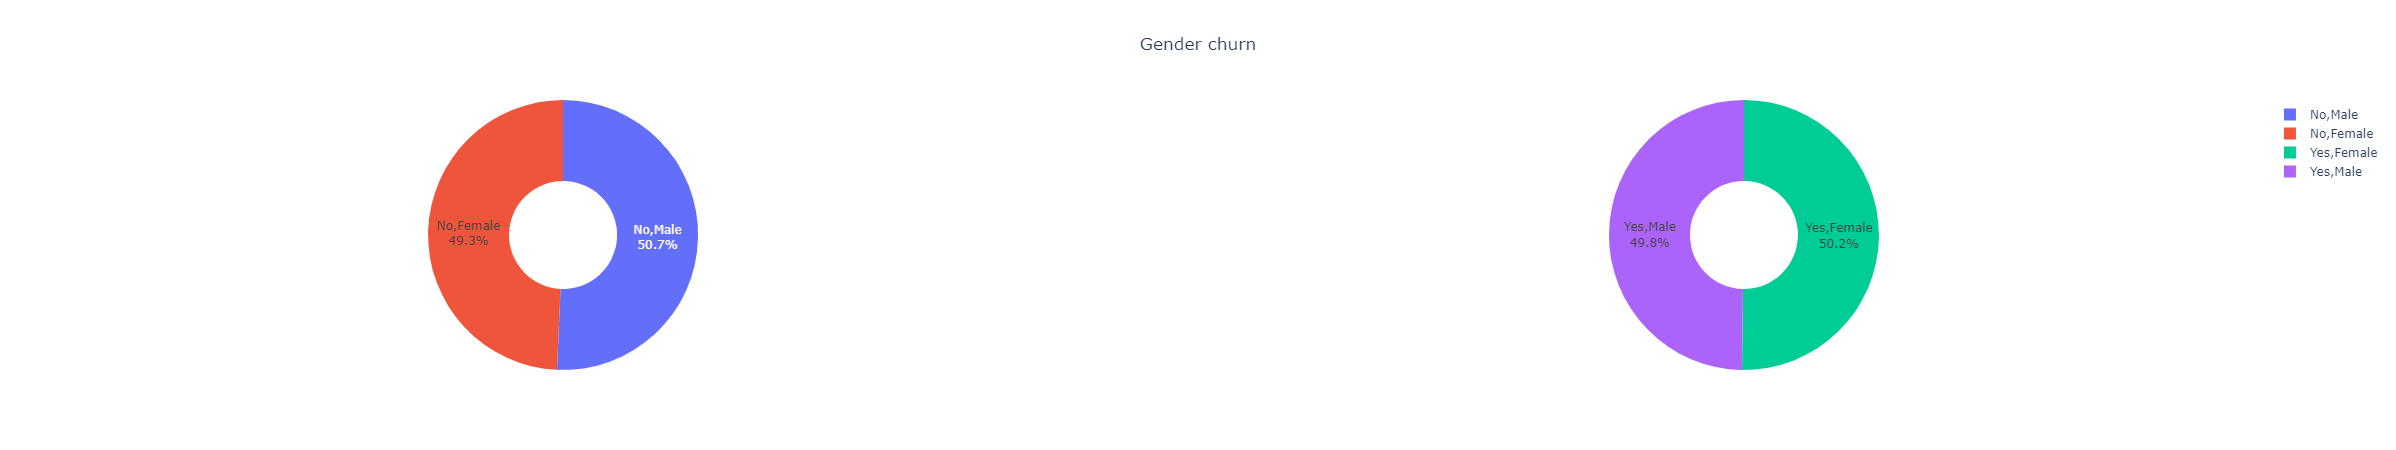

In [277]:
# Churned based on gender subplots

grouped = df.groupby(['Churn'])['gender'].value_counts()

# Unchurned subjects
labels = grouped.index[0:2]
target = grouped[0:2]

#Churned subjects
labels2 = grouped.index[2:]
target2 = grouped[2:]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=target,  textinfo='label+percent', name="Female"),
              1, 1)

fig.add_trace(go.Pie(labels=labels2, values=target2,  textinfo='label+percent', name="Male"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+value")

fig.update_layout(title_text="Gender churn", title_x = 0.5)

fig.show()

C:\Users\Alistair\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



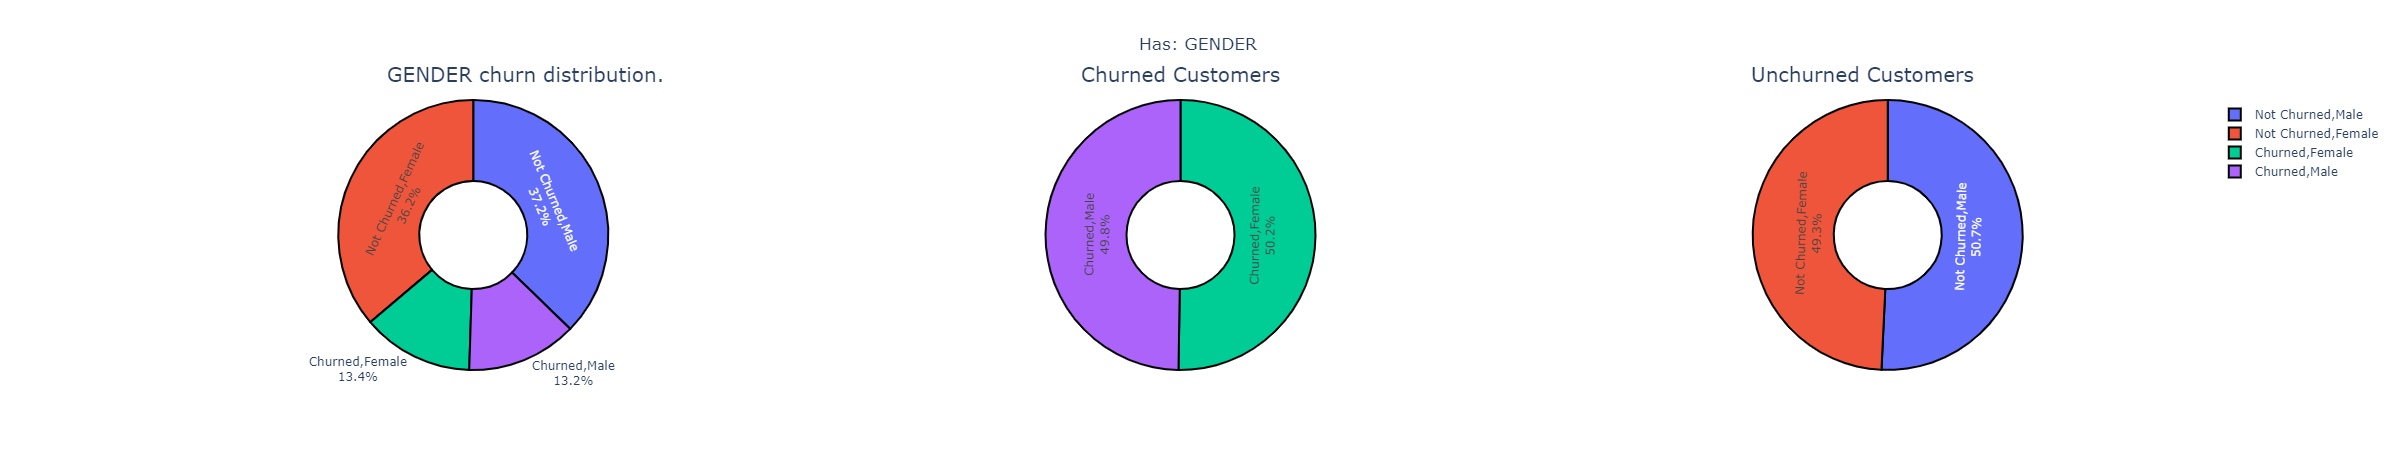

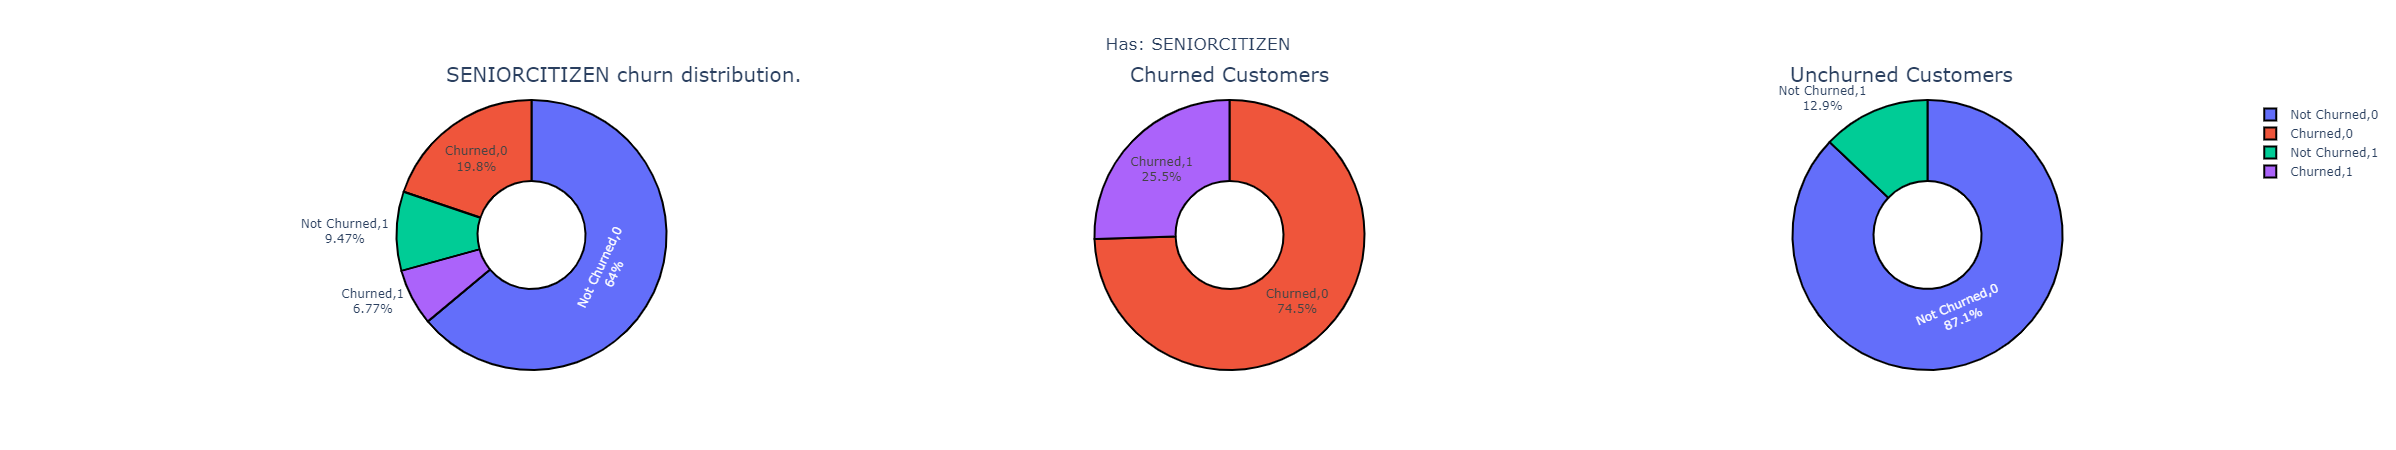

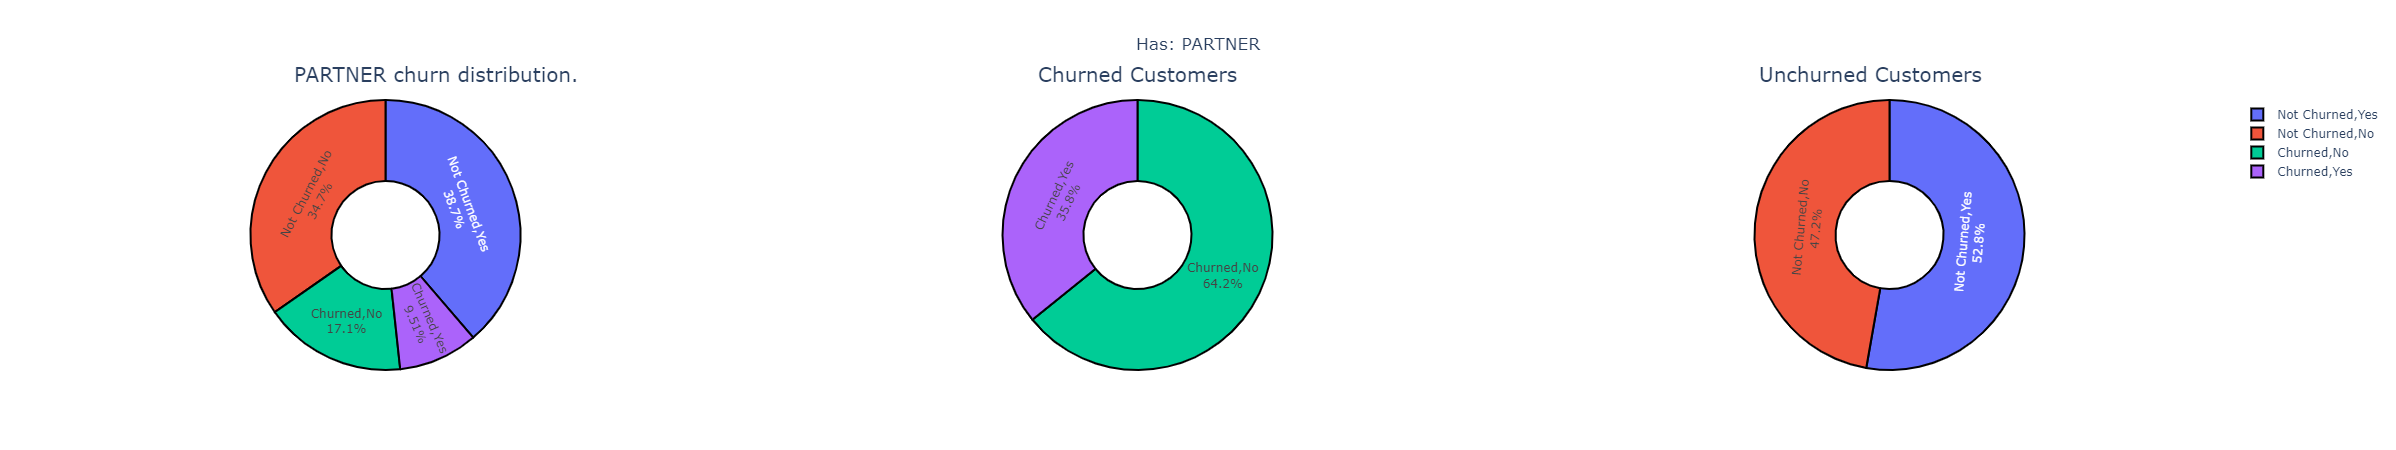

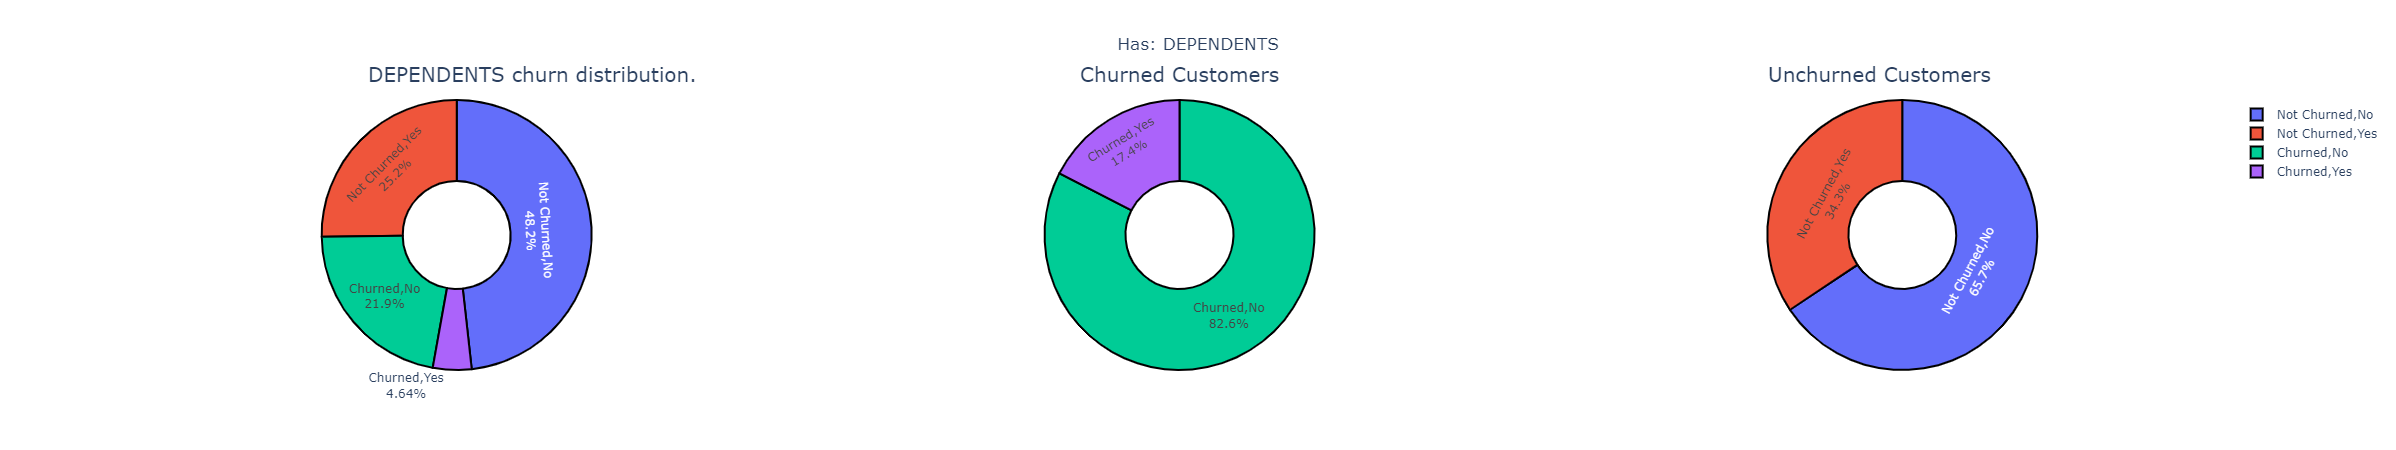

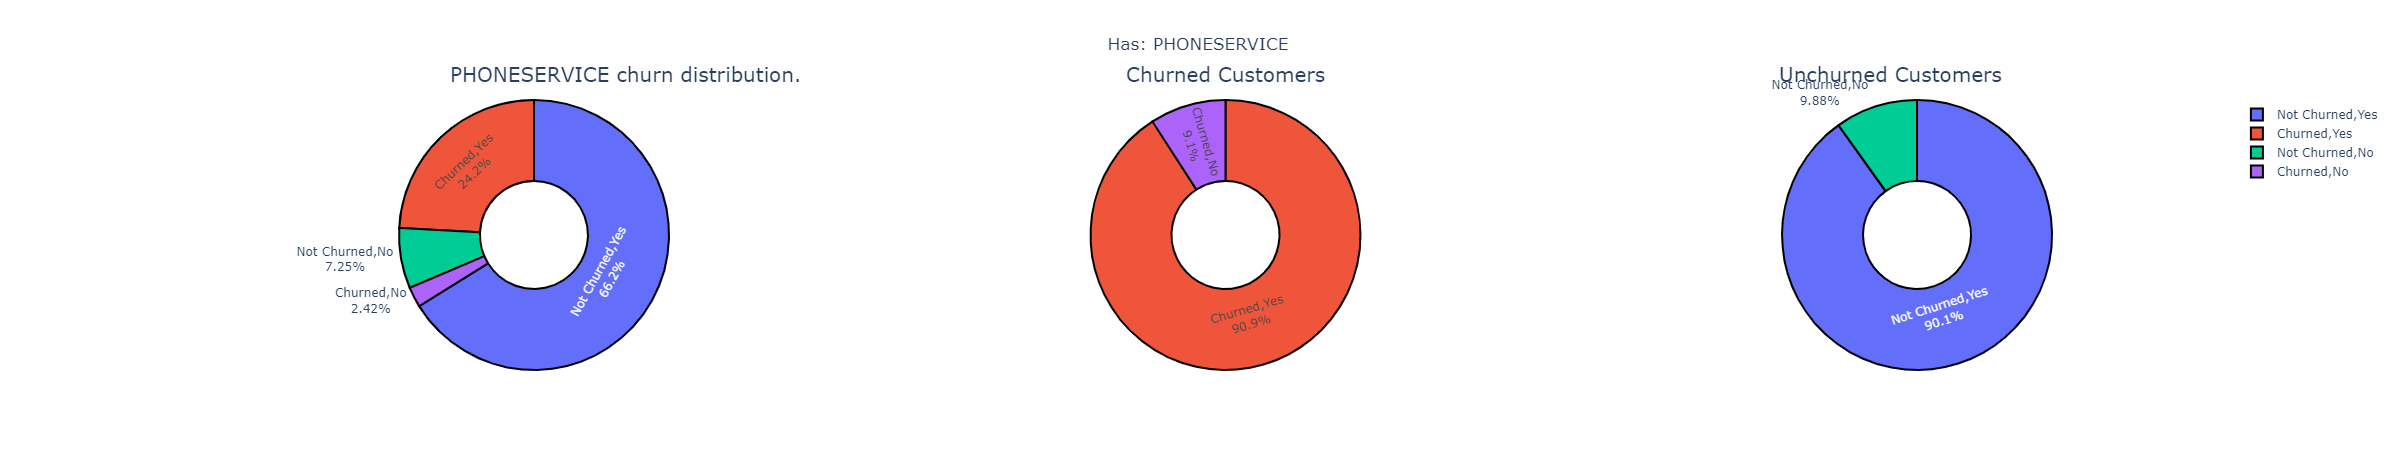

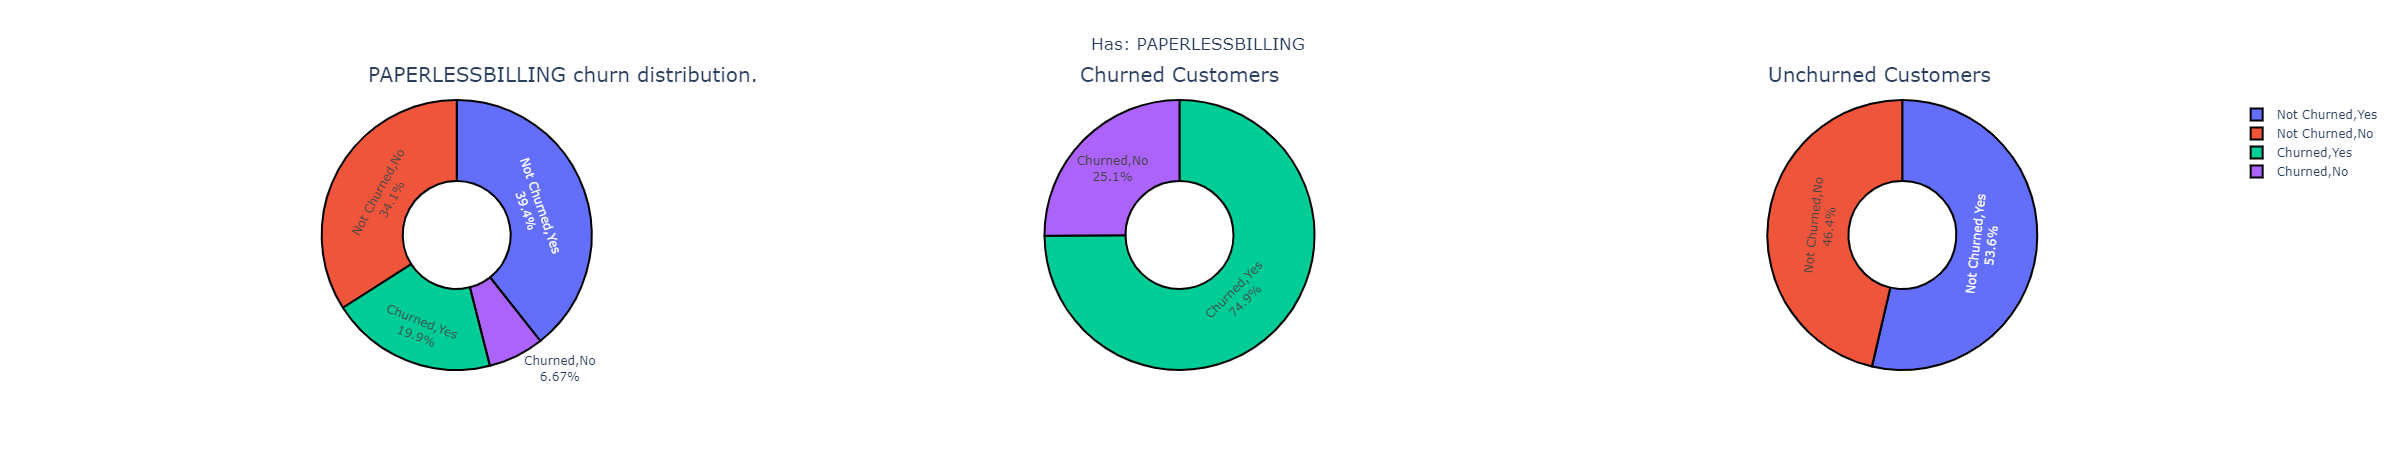

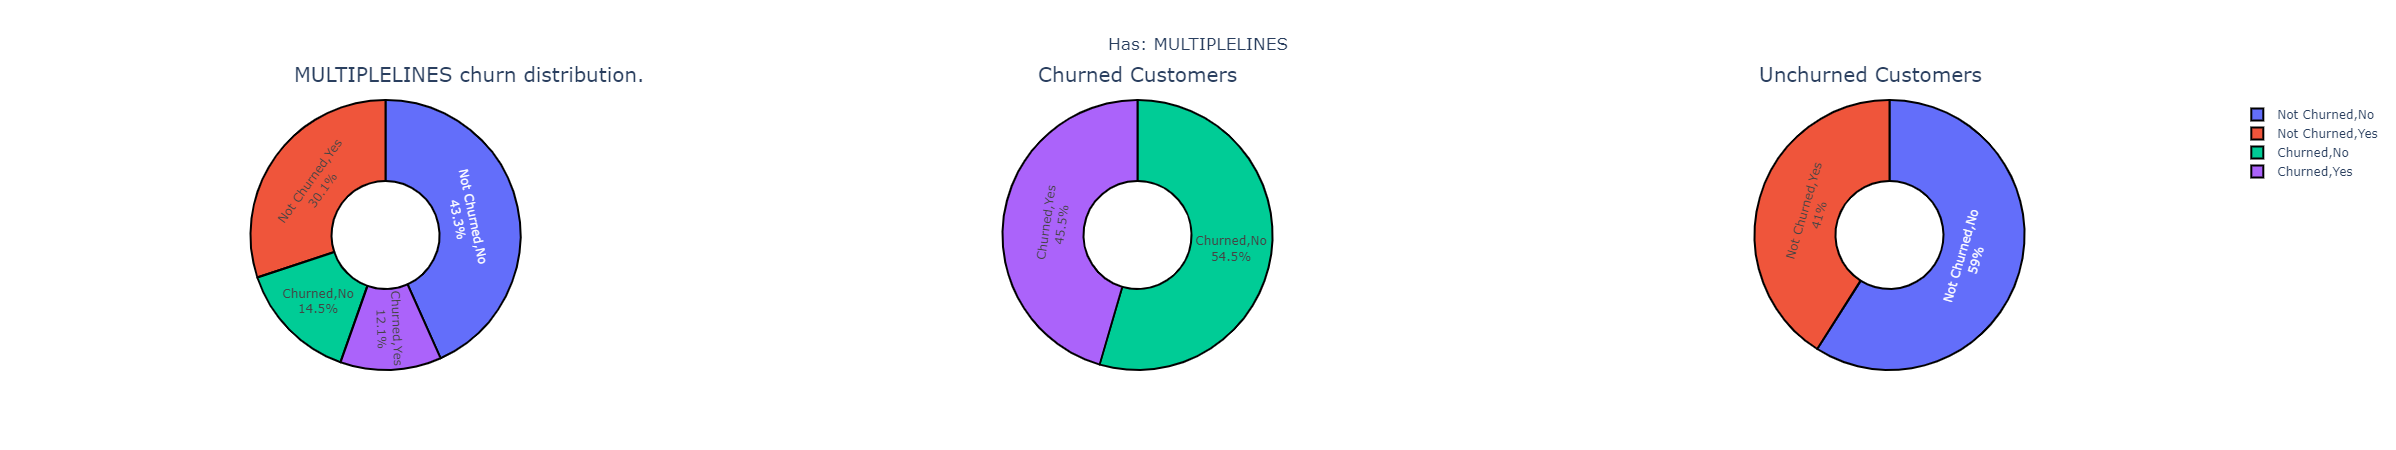

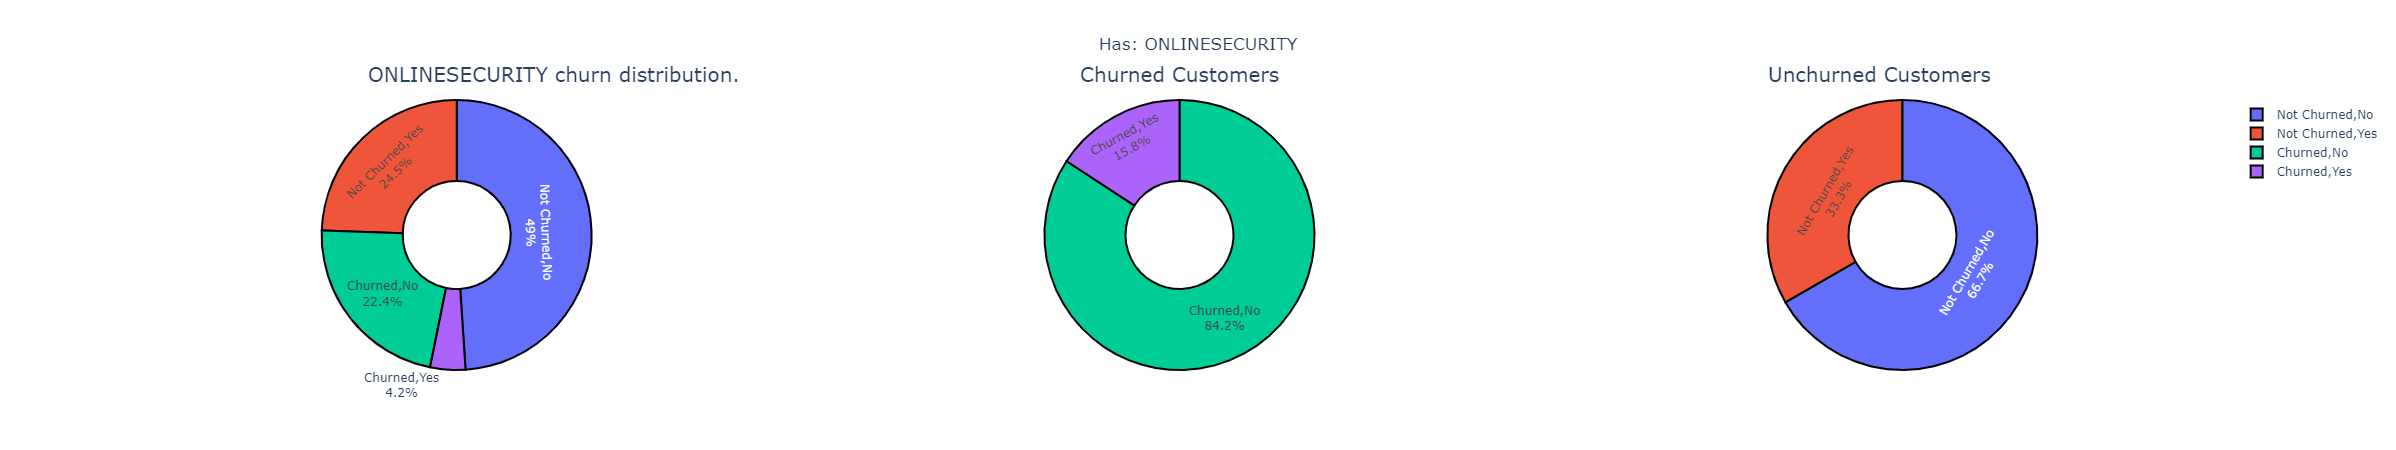

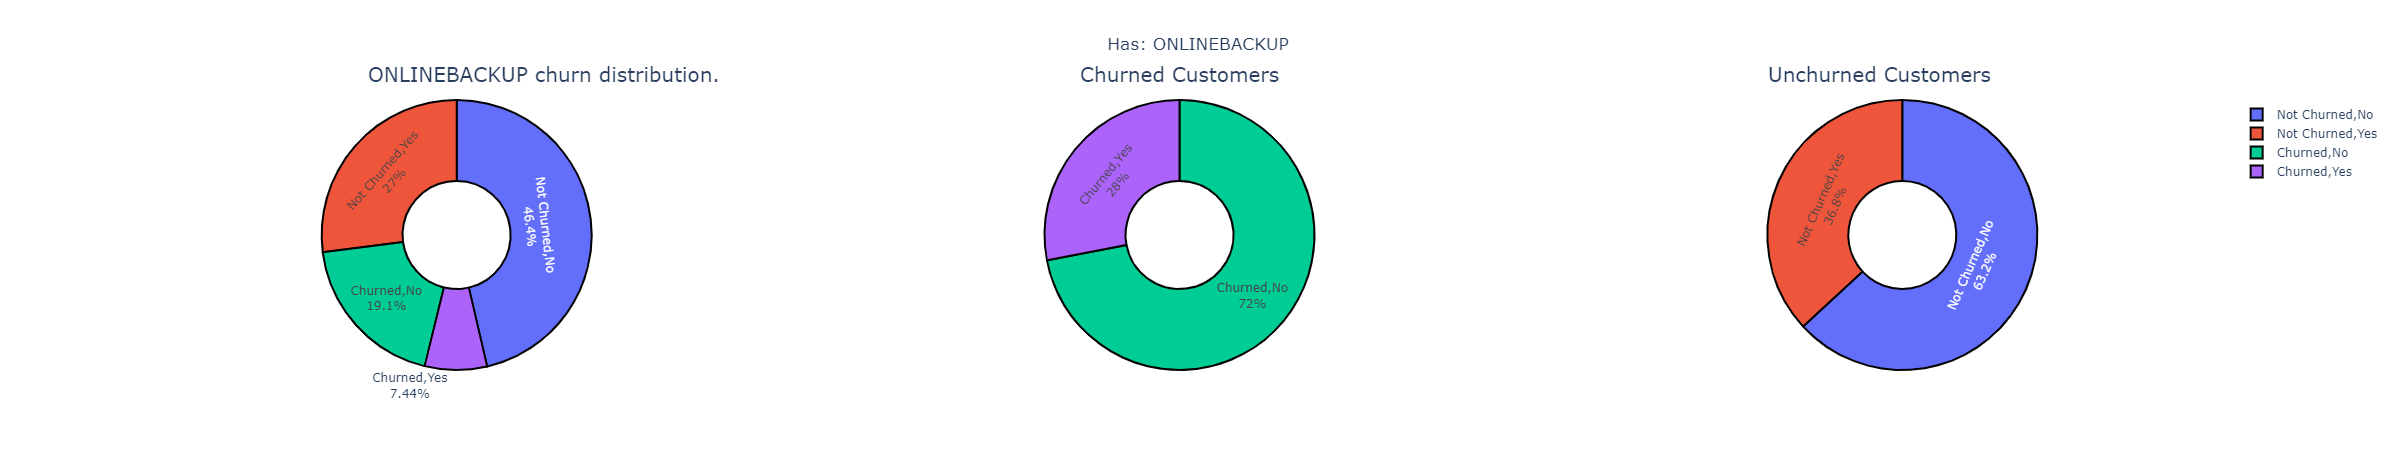

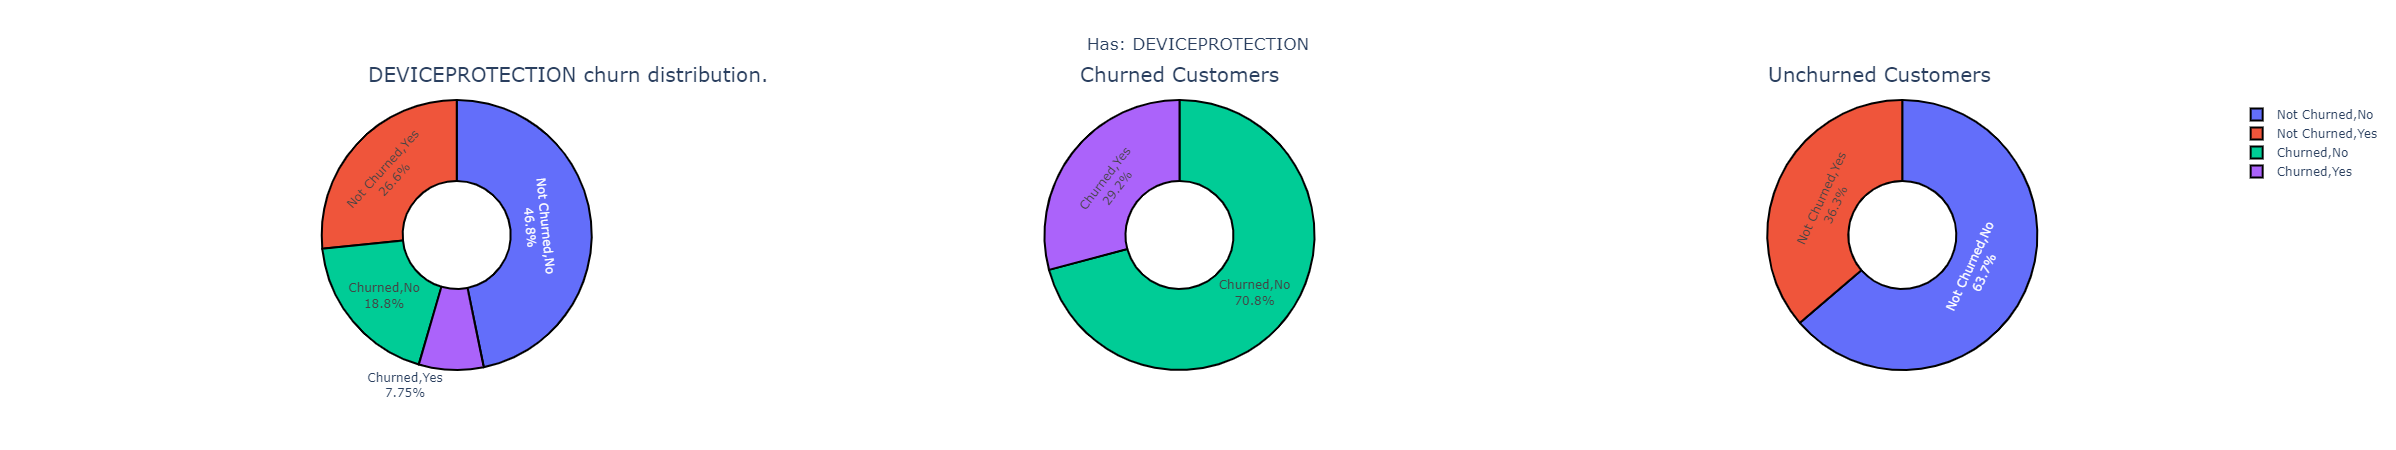

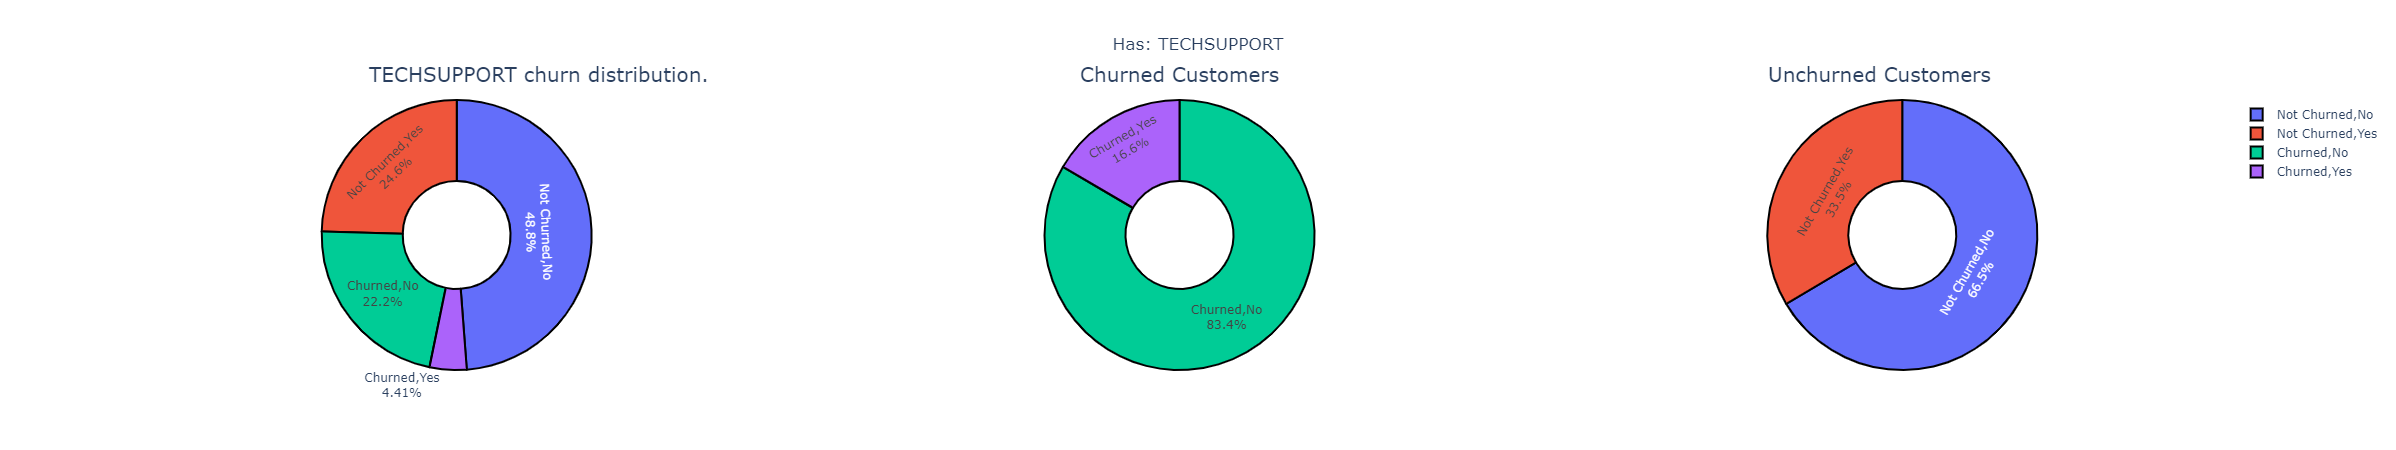

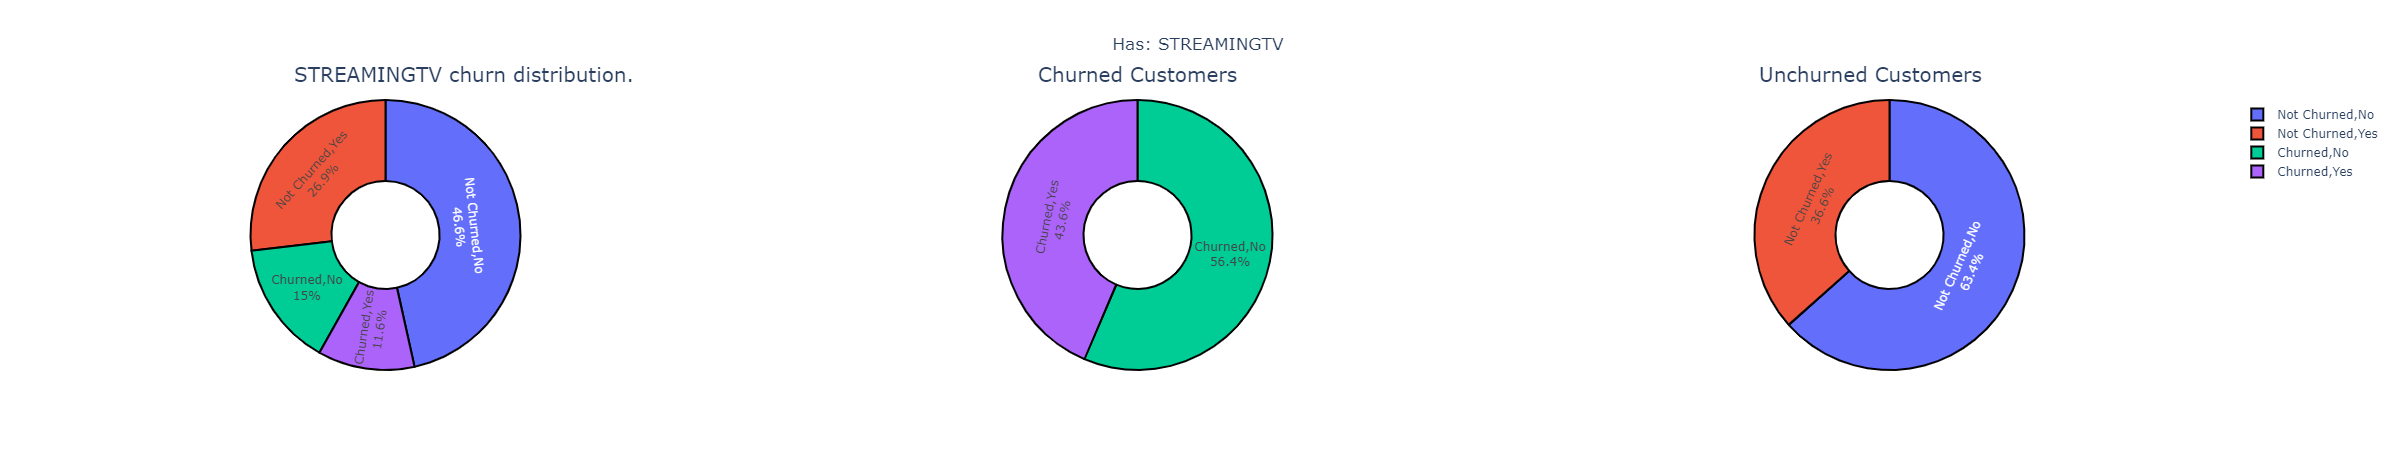

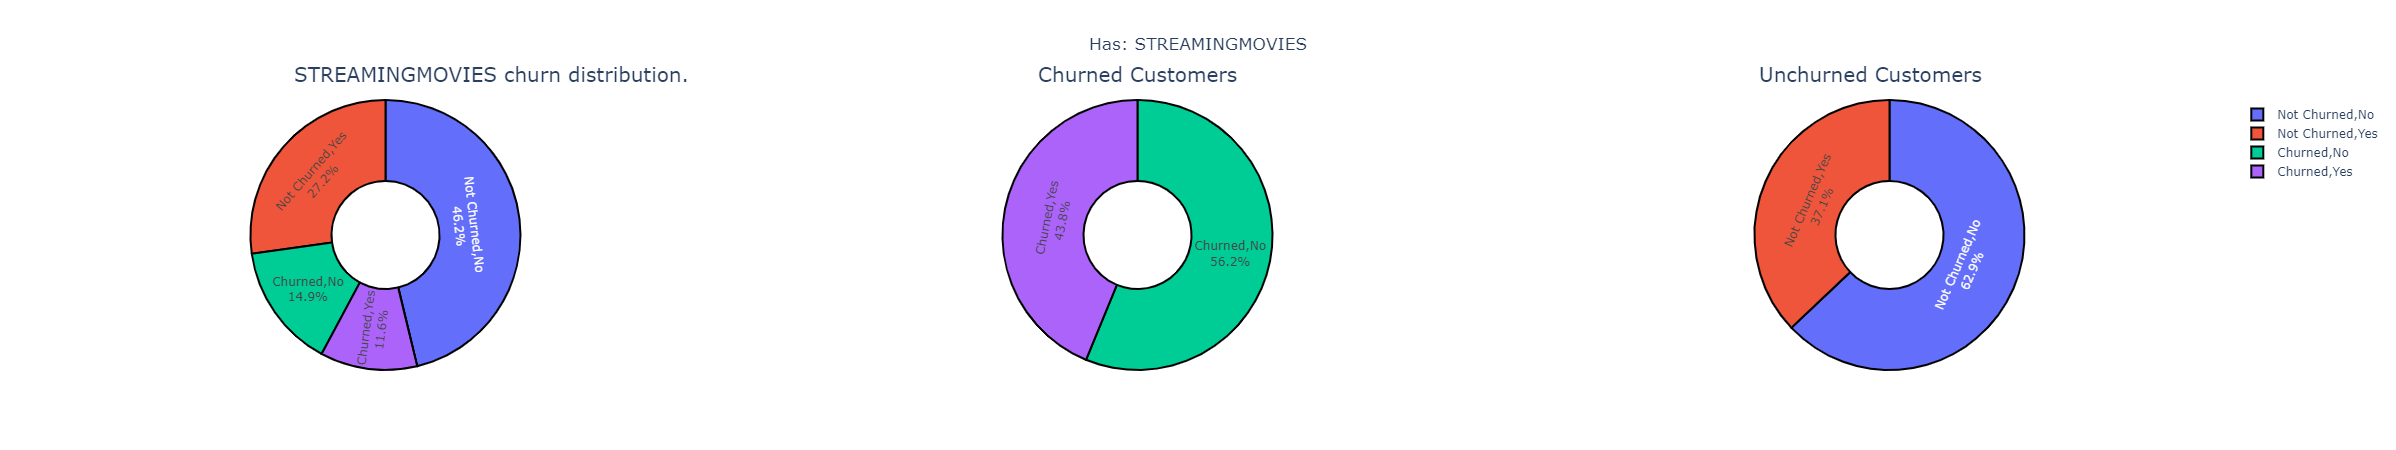

In [278]:
# Plotting multiple charts

# Encoding Churn values columns

df['churned'] = df['Churn'].replace('No', 'Not Churned').replace('Yes', 'Churned') # Create a new column which replaces 'Yes' and 'No' with 'Churned' and 'Not Churned' so as to visualise the pie charts clearly

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',  'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols:
    
    grouped = df.groupby(['churned'])[col].value_counts()

    labels = grouped.index.unique()
    target = grouped

    labels2 = grouped.index[0:2]
    target2 = grouped[0:2]   

    labels3 = grouped.index[2:]
    target3 = grouped[2:]

    # Create subplots: use 'domain' type for Pie subplot
    fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

    fig.add_trace(go.Pie(labels=labels, values=target,  textinfo='label+percent'),
                      1, 1)

    fig.add_trace(go.Pie(labels=labels2, values=target2,  textinfo='label+percent'),
                      1, 2)

    fig.add_trace(go.Pie(labels=labels3, values=target3,  textinfo='label+percent'),
                      1, 3)

    # Use `hole` to create a donut-like pie chart
    fig.update_traces(hole=.4, 
                      hoverinfo="label+percent+value",
                      # Add borders to the piechart
                      marker=dict(line=dict(color='#000000', width=2)))

    fig.update_layout(title_text="Has: " + col.upper(), 
                      title_x = 0.5,
                      # Add annotations in the center of the donut pies.
                      annotations=[dict(text=col.upper() + ' churn distribution.', x=0.1, y=1.15, font_size=20, showarrow=False),
                                   dict(text='Churned Customers', x=0.5, y=1.15, font_size=20, showarrow=False),
                                   dict(text='Unchurned Customers', x=0.9, y=1.15, font_size=20, showarrow=False)])

    fig.show()

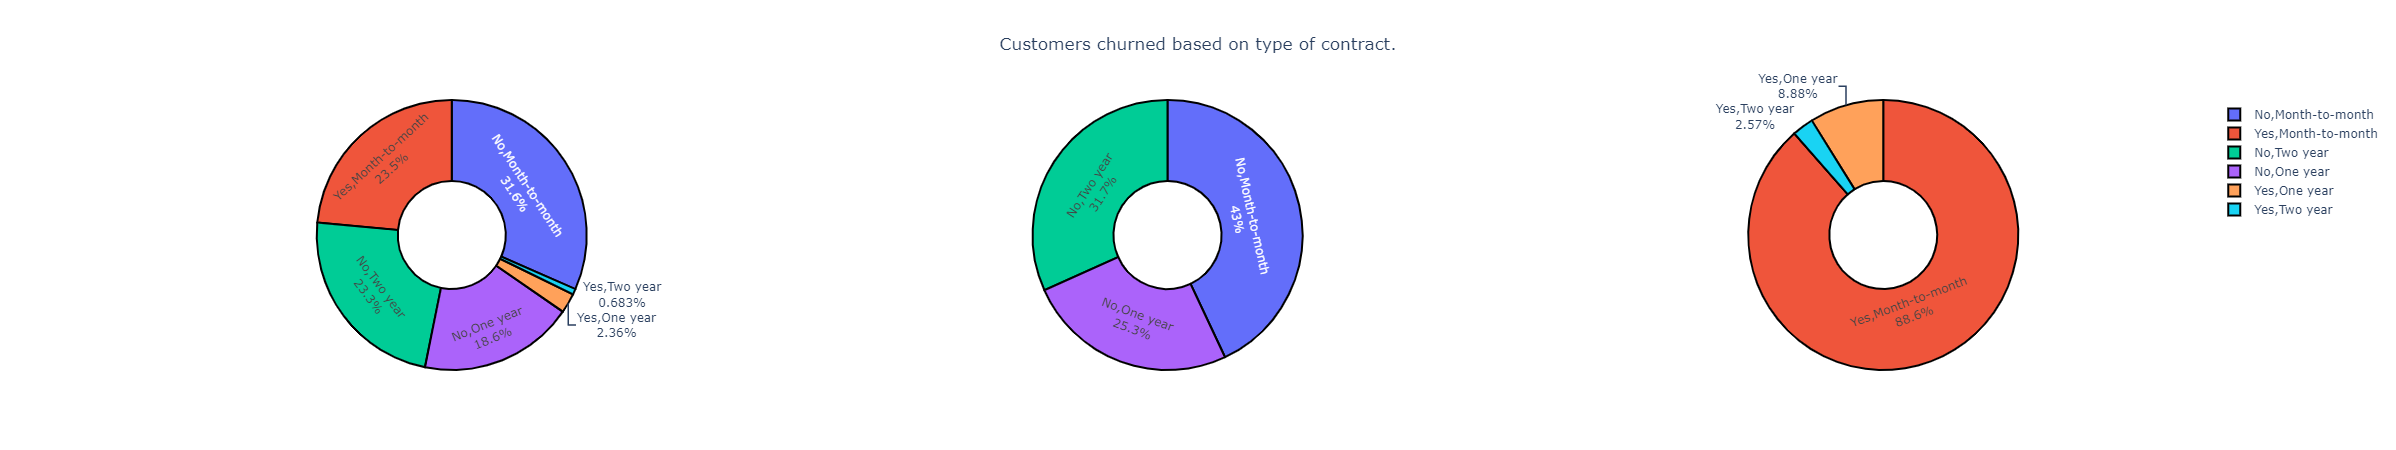

In [279]:
# Check contract type to churn ratio

grouped = df.groupby(['Churn'])['Contract'].value_counts()
    
labels = grouped.index.unique()
target = grouped
    
labels2 = grouped.index[0:3]
target2 = grouped[0:3]

labels3 = grouped.index[3:]
target3 = grouped[3:]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=target,  textinfo='label+percent'),
                  1, 1)

fig.add_trace(go.Pie(labels=labels2, values=target2,  textinfo='label+percent'),
                  1, 2)
    
fig.add_trace(go.Pie(labels=labels3, values=target3,  textinfo='label+percent'),
                  1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, 
                  hoverinfo="label+percent+value",
                  marker=dict(line=dict(color='#000000', width=2)))

fig.update_layout(title_text="Customers churned based on type of contract.", 
                  title_x = 0.5)

fig.show()

# So the pie charts tell us that churned customers are more likely to be:
* No dependents
* Not a senior citizen
* No partners
* Has a phone service
* On a month to month contract

But overall, the piecharts are difficult to tell a clear correlation with the features and churned customers.

## Let's try using barplots to represent this instead

In [280]:
# Grouping the dataset by churn and feature and converting it into a dataframe

grouped = df.groupby(['StreamingMovies'])['Churn'].value_counts().to_frame() 
grouped

Churn
StreamingMovies Churn       
No              No      3250
                Yes     1051
Yes             No      1913
                Yes      818

In [281]:
# Renaming the counts column and reseting the index

grouped = grouped.rename({'Churn' : 'Percentage of customers'}, axis=1).reset_index() 
grouped

,StreamingMovies,Churn,Percentage of customers
0,No,No,3250
1,No,Yes,1051
2,Yes,No,1913
3,Yes,Yes,818


In [282]:
# Convert the counts into percentages

grouped['Percentage of customers'] = grouped['Percentage of customers']/len(df)
grouped

,StreamingMovies,Churn,Percentage of customers
0,No,No,0.462173
1,No,Yes,0.149460
2,Yes,No,0.272042
3,Yes,Yes,0.116325


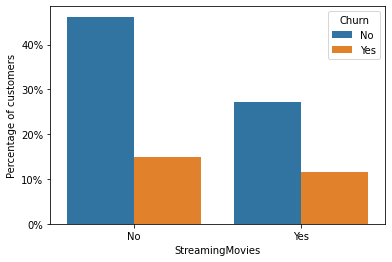

In [283]:
# Plot the grouped data

import matplotlib.ticker as mtick # library to convert axis label to percentage

ax = sns.barplot(data=grouped, x='StreamingMovies', y='Percentage of customers', hue = 'Churn', orient='v')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

[]

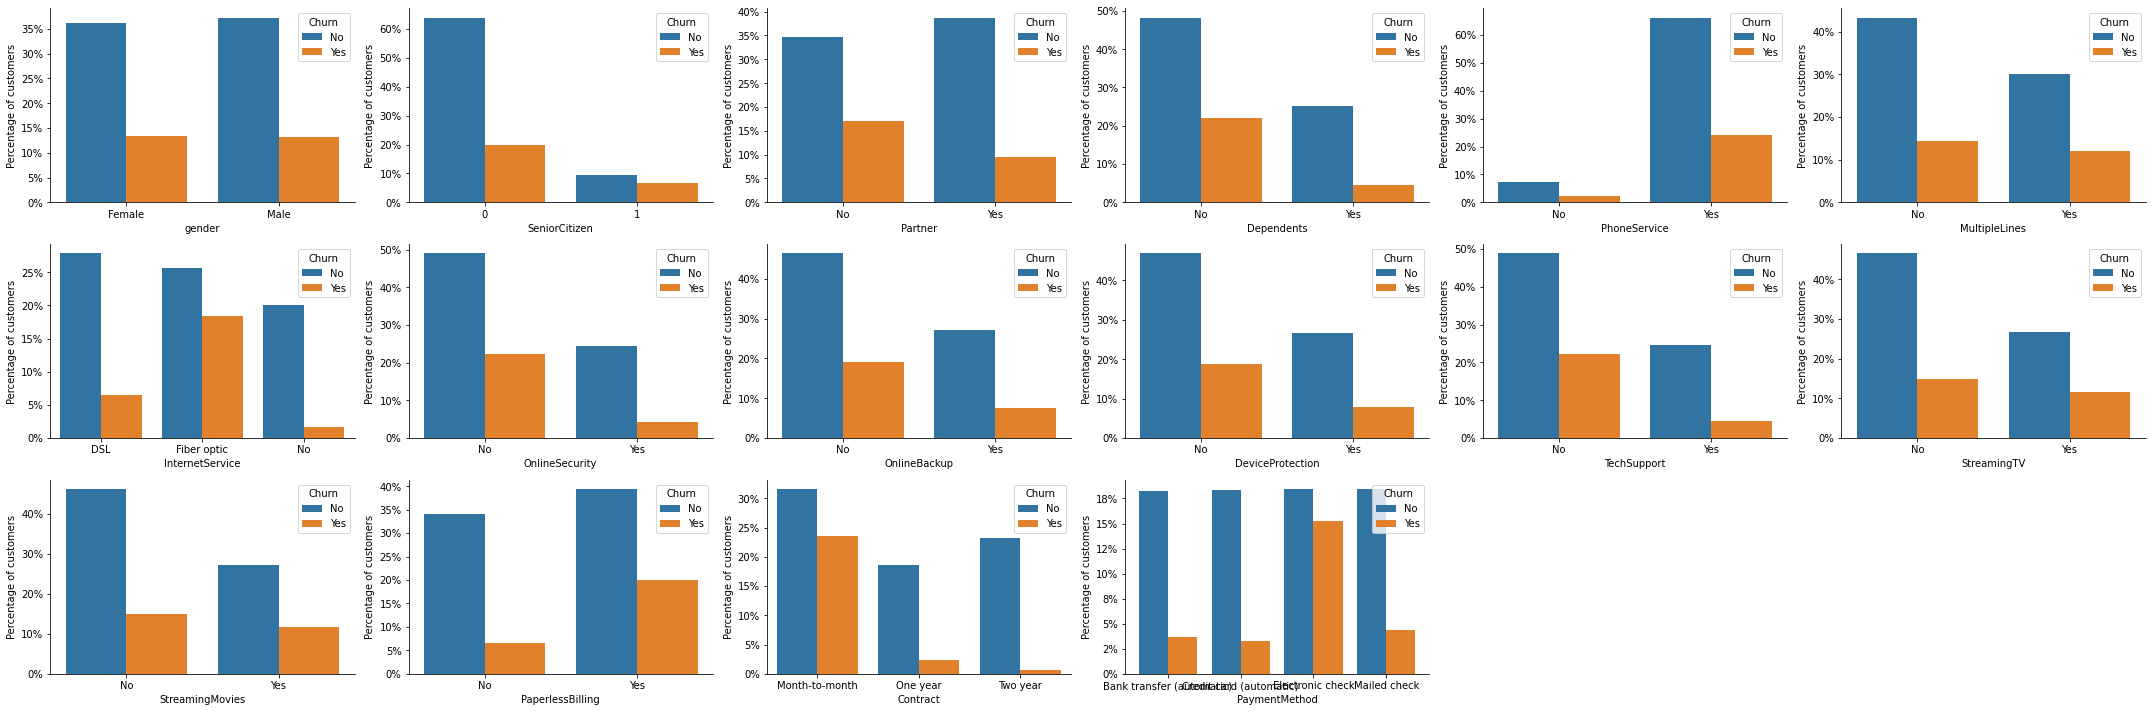

In [284]:
# using a loop to plot multiple features
# Plotting features on the x axis with churn as the colour labels

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract', 'PaymentMethod']

index = 1
rows = 3
columns = 6

plt.figure(figsize=[30,10])

for col in cols:
    plt.subplot(rows,columns,index)    
    grouped = df.groupby([col])['Churn'].value_counts().to_frame()
    grouped = grouped.rename({'Churn' : 'Percentage of customers'}, axis=1).reset_index()
    grouped['Percentage of customers'] = grouped['Percentage of customers']/len(df)
    ax = sns.barplot(data=grouped, x=col, y='Percentage of customers', hue = 'Churn', orient='v')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
    sns.despine()
    index += 1

plt.tight_layout()
ax.plot()

[]

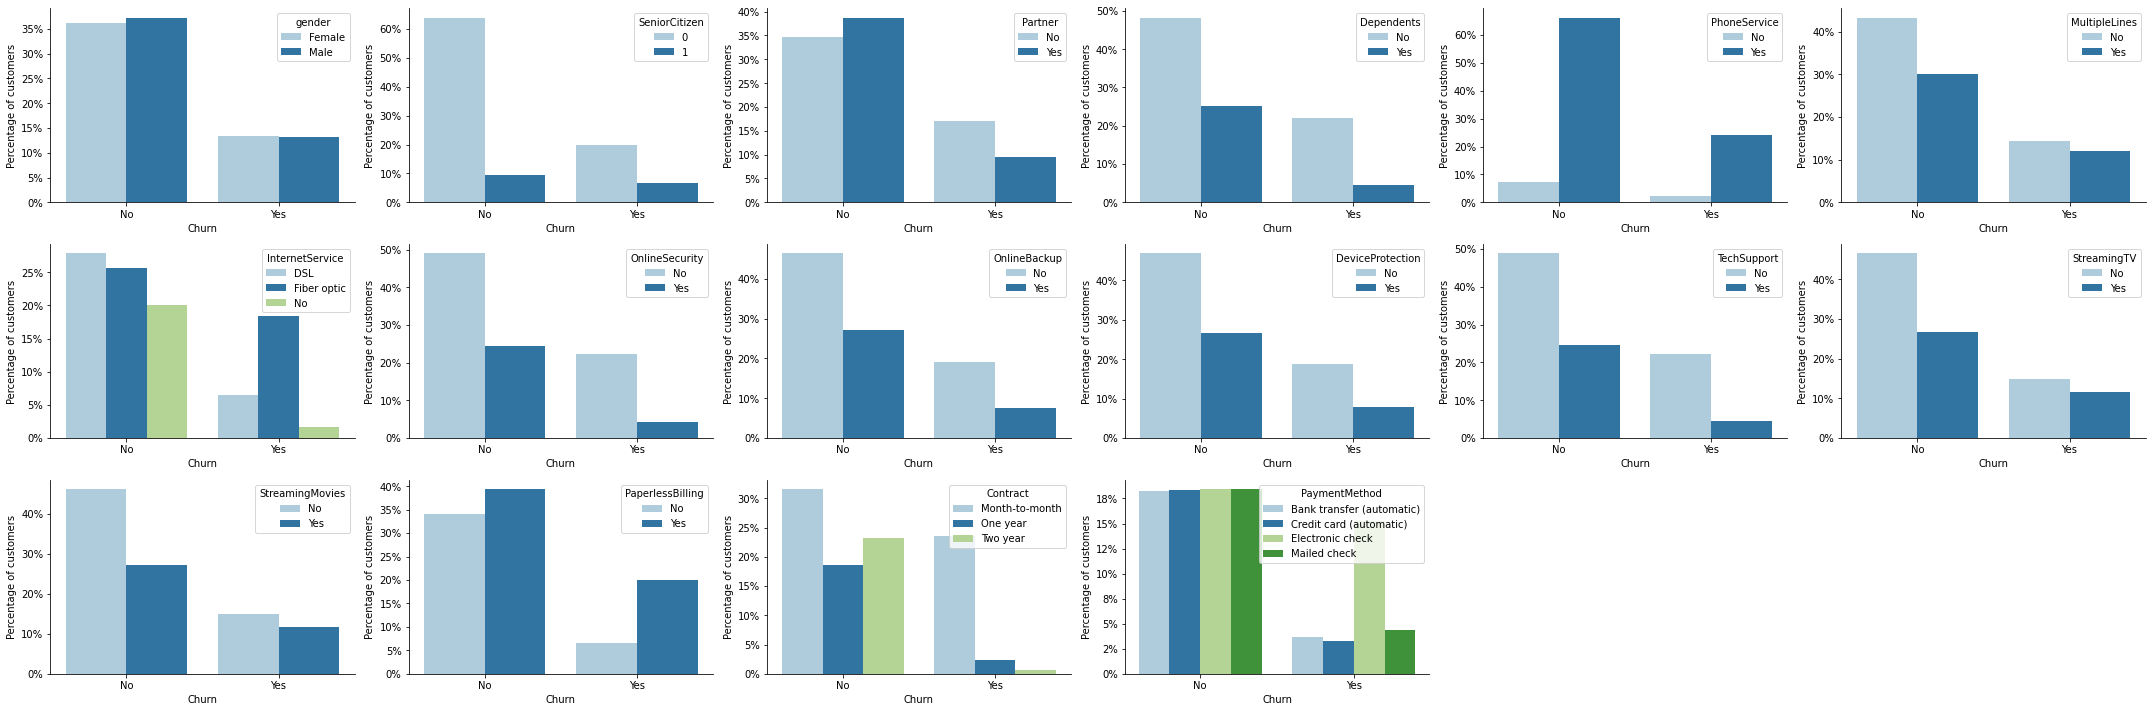

In [285]:
# Plotting churn as the x axis with features as the colour labels

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Contract', 'PaymentMethod']

index = 1
rows = 3
columns = 6

plt.figure(figsize=[30,10])

for col in cols:
    plt.subplot(rows,columns,index)    
    grouped = df.groupby([col])['Churn'].value_counts().to_frame()
    grouped = grouped.rename({'Churn' : 'Percentage of customers'}, axis=1).reset_index()
    grouped['Percentage of customers'] = grouped['Percentage of customers']/len(df)
    ax = sns.barplot(data=grouped, x='Churn', y='Percentage of customers', hue = col, palette = 'Paired', orient='v')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
    sns.despine()
    index += 1

plt.tight_layout()

ax.plot()

## In my opinion, the bar plots look a lot better and it is easier to tell the features correlated to churn than pie charts

From the bar charts we can tell the customers that are likely to be churned are:
* Not a senior citizen
* Has no partner
* Has no dependents
* Has phone service
* Uses fibre optic
* Does not have online security
* Does not have online backup
* Has no device protection
* Has no tech support
* Does not stream TV or Movies
* Has paperlessbilling
* On a month-to-month contract
* Pays by electronic check

# Explore distribution in continuous numerical features

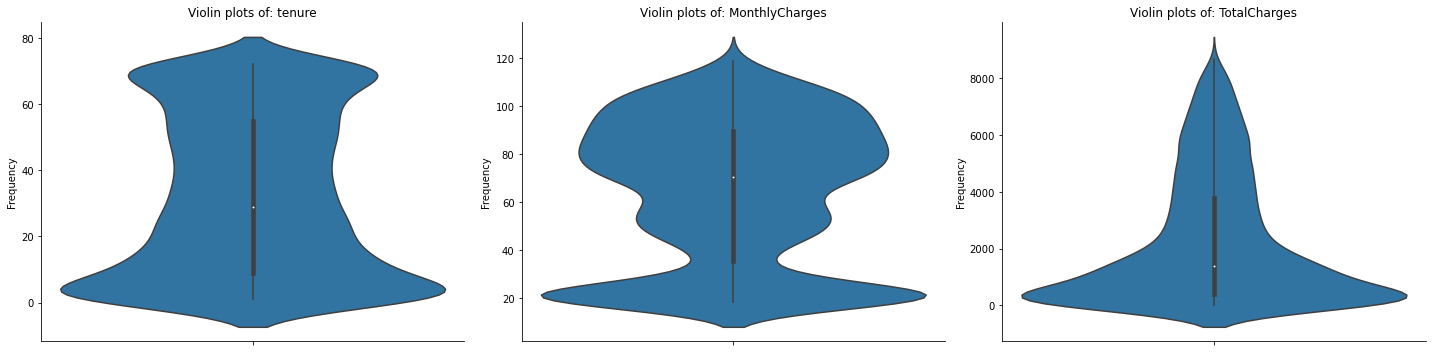

In [286]:
# Violin plots

index_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=[20,5])

index = 1
rows = 1
columns = 3

for col in index_cols:
    plt.subplot(rows,columns,index)
    sns.violinplot(data=df, x=df[col], orient='v')
    sns.despine()
    plt.title('Violin plots of: ' + col)
    plt.ylabel('Frequency')
    index += 1
    
plt.tight_layout()
plt.show()

In [ ]:
# Violin plots with plotly express which show points distribution and grouped according to churn
# Warning that plotting this results in a performance slowdown of the kernel

index_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for cols in index_cols:
    fig = px.violin(df, y=cols, x='Churn', color='Churn', box=True, points="all", orientation='v')
    fig.show()


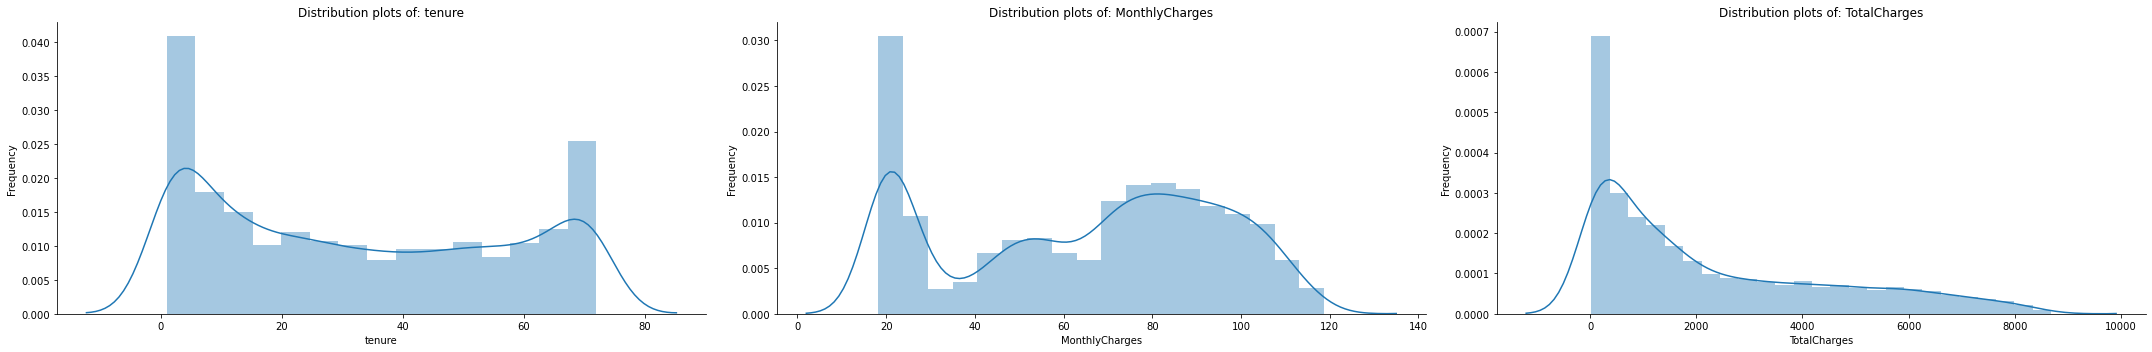

In [287]:
# Distribuition plots of numerical features
# Contains a kernel density estimation(KDE) line plot
# KDE gives an estimation of the probability density function of a random variable
# It is basically one half of the violin plot distribution

index_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=[30,5])

index = 1
rows = 1
columns = 3

for col in index_cols:
    plt.subplot(rows,columns,index)
    sns.distplot(df[col])
    sns.despine()
    plt.title('Distribution plots of: ' + col)
    plt.ylabel('Frequency')
    index += 1

plt.tight_layout()
plt.show()

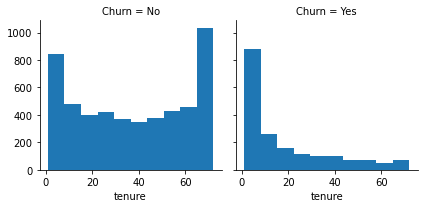

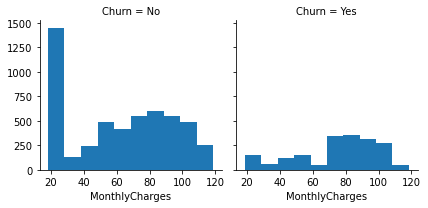

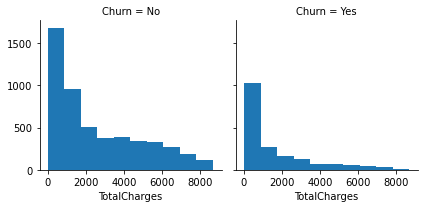

In [288]:
# Plot histograms which are distinguished based on churned customers

index_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


for cols in index_cols:
    ax = sns.FacetGrid(df, col='Churn')
    ax.map(plt.hist, cols)

# y axis represents counts

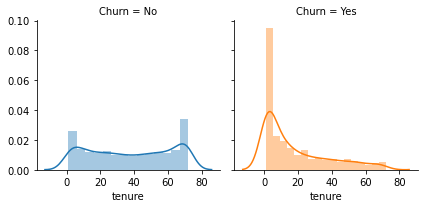

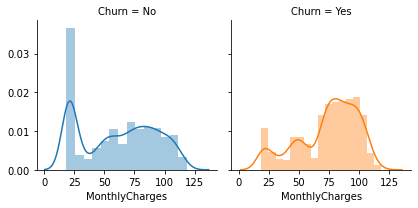

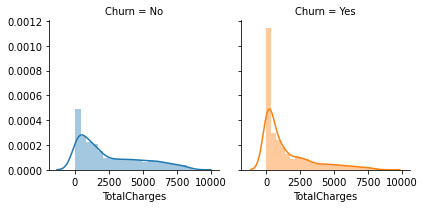

In [289]:
# Plot distribution plots which have KDE plots, which are distinguished based on churned customers

index_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for cols in index_cols:
    ax = sns.FacetGrid(df, col='Churn', hue='Churn')
    ax.map(sns.distplot, cols)

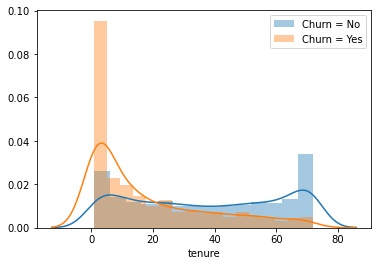

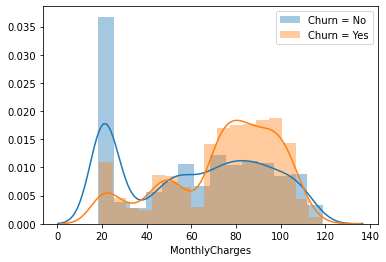

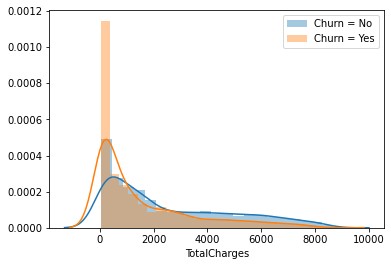

In [290]:
## Combining distplots of churned and unchurned customers

index_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for cols in index_cols:
    sns.distplot(df[df['Churn'] == 'No'][cols], label = 'Churn = No')
    sns.distplot(df[df['Churn'] == 'Yes'][cols], label = 'Churn = Yes')
    plt.legend()
    plt.show()

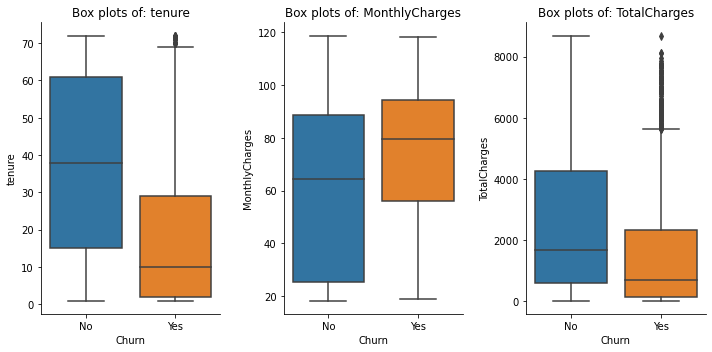

In [291]:
# Box plots

index_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=[10,5])

index = 1
rows = 1
columns = 3

for col in index_cols:
    plt.subplot(rows,columns,index)
    sns.boxplot(x=df['Churn'], y=df[col], orient='v')
    sns.despine()
    plt.title('Box plots of: ' + col)
    plt.ylabel(col)
    index += 1
    
plt.tight_layout()
plt.show()

## Customers that are more likely to be churned are:

* Are with the company a lot shorter (less tenure)
* Pay a lot more in monthly charges
* Has less total charges (probably correlated to how few addtional services they subscribe to)

# Encoding

Encoding is a way to convert categorical features into numerical values so it can be used for correlation and modelling later.

## Feature encoding using Ordinal coding 

Here **ordinal encoding** is used to ensure that the encoding of variables retains the ordinal nature of the variable. 
* Ordinal means the order that it is described as e.g. No = 0, Yes = 1

In [292]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churned
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Not Churned


In [293]:
# Encoding Yes No columns
encode_dict = {'No' : 0,
               'Yes': 1}

encoding_cols = ['Partner', 'Dependents', 'PhoneService',  'PaperlessBilling', 'Churn', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in encoding_cols:
    df[col] = df[col].map(encode_dict)

C:\Users\Alistair\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [294]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churned
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,Not Churned
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,Not Churned
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,Churned
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Not Churned
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0,Not Churned
7028,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,Not Churned
7029,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,Not Churned
7030,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,Churned


## Using get_dummies pandas functtion to encode other categorical values for modelling

In [295]:
# Get dummies

df = pd.get_dummies(df, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod'])

In [204]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,0,1,1,0,0,0,1,0,0,0,0,1
7028,2234-XADUH,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,1,0,0,1,0,0,1,0,0,1,0,0
7029,4801-JZAZL,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,1,0,1,0,0,1,0,0,0,0,1,0
7030,8361-LTMKD,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,0,1,0,1,0,1,0,0,0,0,0,1


# Correlation of features with the churned feature

Now let's put our predictions to the test with correlation plots

(array([0.5]), <a list of 1 Text major ticklabel objects>)

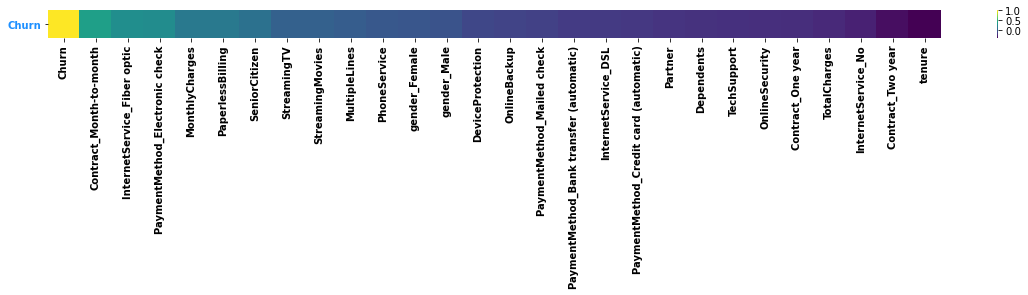

In [303]:
# Plot based on correlation to sale price from high to low
# Use pearson correlation to correlate features

dfcorr = df.corr()

ChurnCorr = pd.DataFrame(dfcorr['Churn'].sort_values(ascending=False), columns=['Churn'])

plt.figure(figsize=(20,0.5))
sns.heatmap(data=ChurnCorr.transpose(), cmap='viridis')
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

In [304]:
# Narrow down the correlation window to specifically for saleprice

cm = sns.light_palette("orange", as_cmap=True)

ChurnCorr.style.background_gradient(cmap=cm)

,Churn
Churn,1.000000
Contract_Month-to-month,0.404565
InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
StreamingTV,0.063254
StreamingMovies,0.060860
MultipleLines,0.040033


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

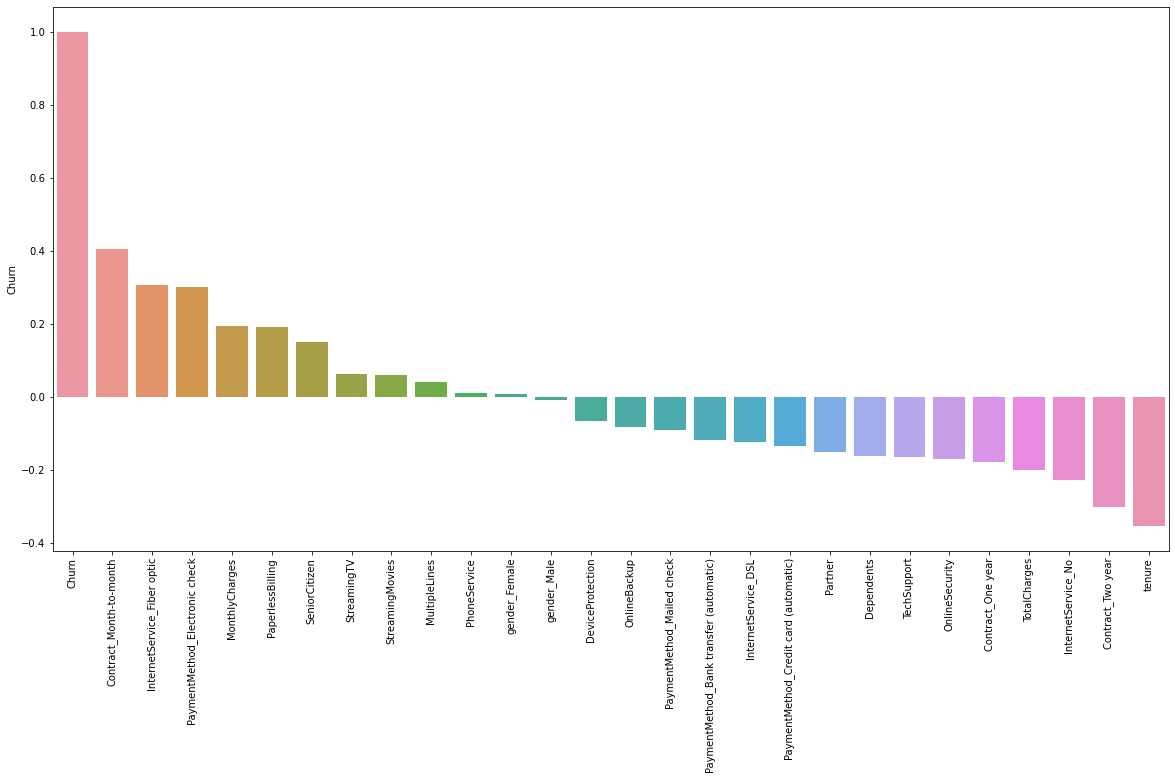

In [332]:
plt.figure(figsize=(20,10))
sns.barplot(x=ChurnCorr.index, y=ChurnCorr['Churn'])
plt.xticks(rotation=90)

From the correlation plots, we can see that the most likely churned customers are:

* Are on contract month-to-month and not on a 2 year contract
* Uses fiber optic
* Pays by eletronic check
* Don't have long tenure with the company's service

Which agrees with our EDA.

# Modelling (Section to be completed TBC)

A very brief overview of the ML components - there is still more work to be done to explore the detail of the machine learning methods

Modelling approaches we will use here are:
* Logistic regression
* Decision tree
* Random forest
* SVM
* ADA Boost
* XG Boost

Based on kernel: https://www.kaggle.com/bandiatindra/telecom-churn-prediction

and others...

## Splitting the dataframe in x (features) and y (target)

In [483]:
y = df['Churn']
x = df.drop(columns=['customerID', 'Churn', 'churned'])

## Feature scaling

Scaling the data to normalise the magnitude of the measurements to improve model score accuracy 

Refer to this article here on feature scaling: https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1

Other types of scaling include MinMaxScaler and Normalizer from sklearn library

In [484]:
# Here we use RobustScaler, which uses statistics that are robust to outliers

scaler = RobustScaler()

# transform "x_train"
X = scaler.fit_transform(x)

In [485]:
# # MinMaxScaler

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x = scaler.fit_transform(x)

In [486]:
# # Normalizer 

# from sklearn.preprocessing import Normalizer

# scaler = Normalizer()
# x = scaler.fit_transform(x)

In [487]:
# Create train & test data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic regression

In [488]:
# Logistic regression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [489]:
# Scoring the model on the test 

acc_lr = model.score(X_test, y_test)
acc_lr

0.8004739336492891

In [439]:
# To get the weights of all the variables

weights = pd.Series(model.coef_[0], index=x.columns.values).sort_values(ascending = False)
weights

TotalCharges                               0.909640
InternetService_Fiber optic                0.782463
Contract_Month-to-month                    0.752350
MultipleLines                              0.373157
StreamingMovies                            0.323096
StreamingTV                                0.289576
PaperlessBilling                           0.266519
PaymentMethod_Electronic check             0.260233
SeniorCitizen                              0.213979
Contract_One year                          0.031456
gender_Male                                0.011334
InternetService_DSL                       -0.000980
gender_Female                             -0.011334
Partner                                   -0.034491
PaymentMethod_Bank transfer (automatic)   -0.036664
PaymentMethod_Credit card (automatic)     -0.038736
Dependents                                -0.057704
DeviceProtection                          -0.073556
MonthlyCharges                            -0.150728
OnlineBackup

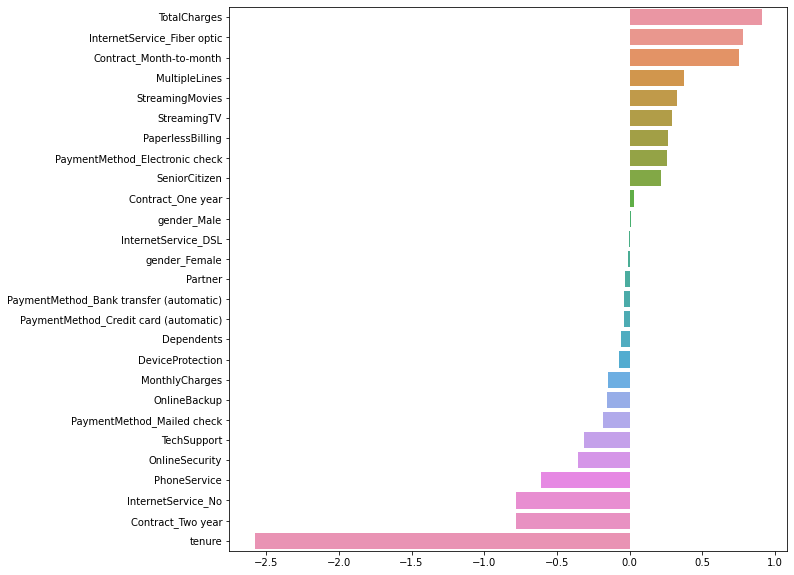

In [438]:
# Plotting the weights

plt.figure(figsize=(10,10))
sns.barplot(x=weights, y=weights.index)

It seems that **tenure** is a huge factor in customer churn

Other slightly lesser features include:
* total charges
* fibre optic internet service
* month to month contract

## Decision Tree

In [490]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
acc_dt = model.score(X_test, y_test)
acc_dt

0.7317535545023697

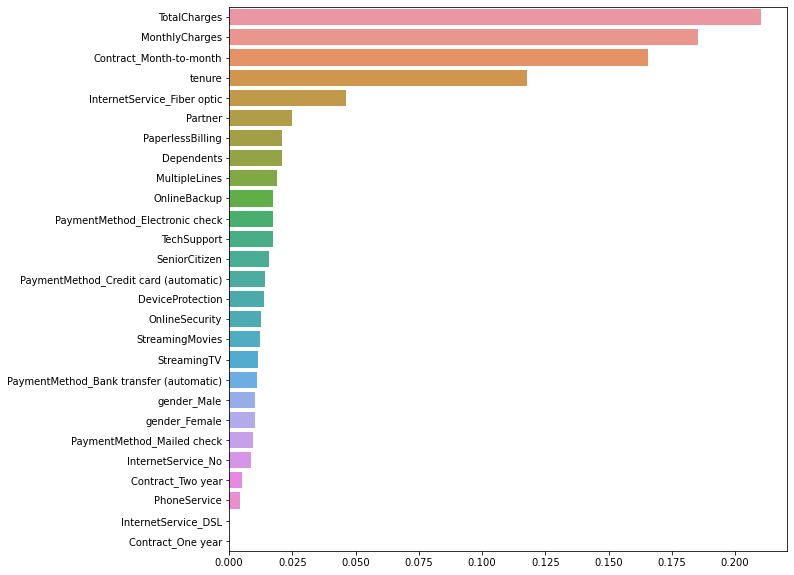

In [491]:
# Plotting the feature importances
importances = model.feature_importances_

weights = pd.Series(importances, index=x.columns.values).sort_values(ascending = False)

plt.figure(figsize=(10,10))
sns.barplot(x=weights, y=weights.index)

## Random Forest

In [492]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
acc_rf = model.score(X_test, y_test)
acc_rf

0.7895734597156399

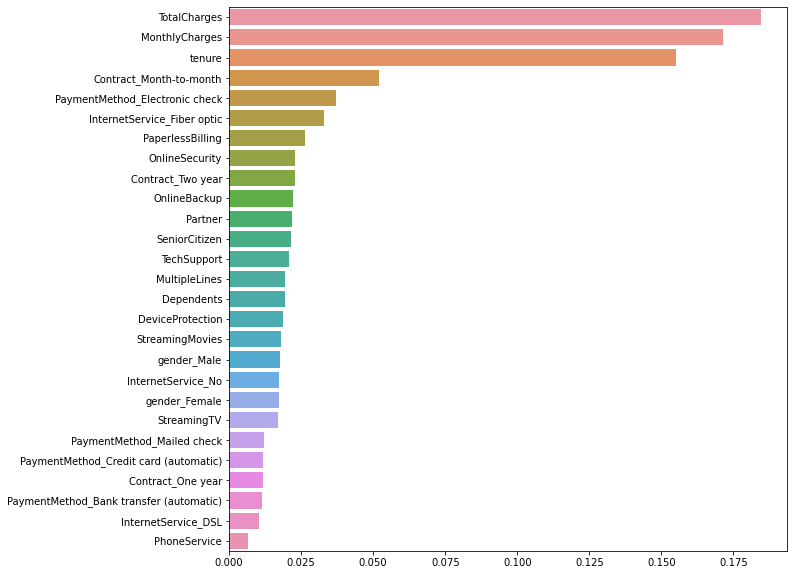

In [458]:
# Plotting the feature importances
importances = model.feature_importances_

weights = pd.Series(importances, index=x.columns.values).sort_values(ascending = False)

plt.figure(figsize=(10,10))
sns.barplot(x=weights, y=weights.index)

## Support Vector Machine(SVM)

In [493]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
acc_svc = model.score(X_test, y_test)
acc_svc

0.8

In [464]:
# To get the weights of all the variables

weights = pd.Series(model.coef_[0], index=x.columns.values).sort_values(ascending = False)
weights

InternetService_Fiber optic                0.980179
MultipleLines                              0.319477
StreamingMovies                            0.307838
StreamingTV                                0.295585
SeniorCitizen                              0.212275
PaymentMethod_Electronic check             0.209141
Contract_Month-to-month                    0.177856
PaperlessBilling                           0.141420
Partner                                    0.034025
gender_Female                              0.011991
gender_Male                               -0.011991
DeviceProtection                          -0.024671
Contract_Two year                         -0.033246
Dependents                                -0.041780
PaymentMethod_Bank transfer (automatic)   -0.057893
PaymentMethod_Credit card (automatic)     -0.061279
OnlineBackup                              -0.065627
PaymentMethod_Mailed check                -0.089969
Contract_One year                         -0.144611
OnlineSecuri

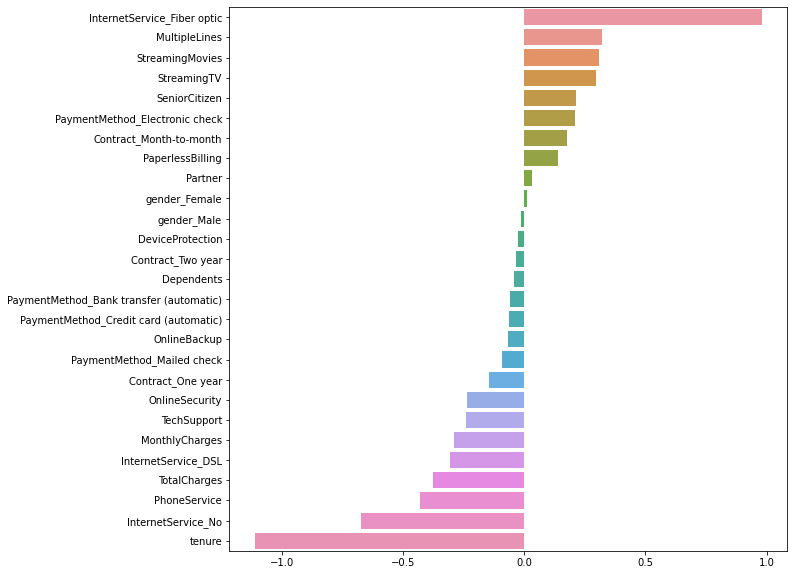

In [465]:
# Plotting the weights

plt.figure(figsize=(10,10))
sns.barplot(x=weights, y=weights.index)

## ADA Boost

In [494]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
acc_ada = model.score(X_test, y_test)
acc_ada

0.7938388625592417

## XG Boost

In [495]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
acc_xgb = model.score(X_test, y_test)
acc_xgb

0.7748815165876777

## K Neighbors Classifier

In [497]:
# K Neighbors Classifier

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
acc_knn = model.score(X_test, y_test)
acc_knn

0.7454976303317535

##  Gaussian Naive Bayes

In [498]:
model = GaussianNB()
model.fit(X_train, y_train)
acc_gnb = model.score(X_test, y_test)
acc_gnb

0.7450236966824645

## Perceptron

In [499]:
model = Perceptron()
model.fit(X_train,y_train)
acc_per = model.score(X_test, y_test)
acc_per

0.7322274881516587

# Model evaluation

In [505]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'ADA Boost', 'XG Boost', 'K Neighbors Classifier', 'Gaussian Naive Bayes', 'Perceptron'],
    'Score': [acc_lr, acc_dt, acc_rf, acc_svc, acc_ada, acc_xgb, acc_knn, acc_gnb, acc_per]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.800474
3,Support Vector Machines,0.800000
4,ADA Boost,0.793839
2,Random Forest,0.789573
5,XG Boost,0.774882
6,K Neighbors Classifier,0.745498
7,Gaussian Naive Bayes,0.745024
8,Perceptron,0.732227
1,Decision Tree,0.731754


More indepth analysis into ML model evaluation here: https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction